In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import io
import bs4 as bs
import urllib.request

In [2]:
pd.set_option('display.max.columns', 50)
pd.set_option('display.max.rows', 1000)

In [4]:
BASE_URL = "http://rotoguru1.com/cgi-bin/fyday.pl?week=WEEK&game=dk&scsv=1&year=YEAR"
WEEKS = range(1,18)
YEARS = range(2014,2018)

In [5]:
df_scrape = pd.DataFrame()
for wk in list(map(str,WEEKS)):
    for yr in list(map(str, YEARS)):
        url = urllib.request.urlopen("http://rotoguru1.com/cgi-bin/fyday.pl?week="+wk+"&game=dk&scsv=1&year="+yr).read()
        soup = bs.BeautifulSoup(url, "lxml")
        week_scrape = pd.read_csv(io.StringIO(soup.find("pre").text),sep=';')
        df_scrape = pd.concat([df_scrape, week_scrape])
df_scrape.head()

,Week,Year,GID,Name,Pos,Team,h/a,Oppt,DK points,DK salary
0,1,2014,1301,"Ryan, Matt",QB,atl,h,nor,34.42,7900.0
1,1,2014,1340,"Stafford, Matthew",QB,det,h,nyg,33.04,9000.0
2,1,2014,1409,"Luck, Andrew",QB,ind,a,den,31.70,8300.0
3,1,2014,1207,"Palmer, Carson",QB,ari,h,sdg,25.06,7500.0
4,1,2014,1263,"Cutler, Jay",QB,chi,h,buf,22.96,7800.0


In [29]:
df_scrape[(df_scrape['Oppt'] == 'nor') & (df_scrape['Pos'] == 'QB') & (df_scrape['Year'] == 2017)]

,Week,Year,GID,Name,Pos,Team,h/a,Oppt,DK points,DK salary
1,1,2017,1344,"Bradford, Sam",QB,min,h,nor,28.54,5900.0
0,2,2017,1131,"Brady, Tom",QB,nwe,a,nor,33.78,7900.0
26,3,2017,1378,"Newton, Cam",QB,car,h,nor,11.28,6600.0
32,3,2017,1239,"Anderson, Derek",QB,car,h,nor,0.68,5400.0
30,4,2017,1263,"Cutler, Jay",QB,mia,h,nor,6.06,5800.0
4,6,2017,1340,"Stafford, Matthew",QB,det,a,nor,22.88,6500.0
18,7,2017,1470,"Hundley, Brett",QB,gnb,h,nor,12.88,5100.0
21,8,2017,1519,"Trubisky, Mitchell",QB,chi,a,nor,10.86,4600.0
23,9,2017,1242,"Fitzpatrick, Ryan",QB,tam,a,nor,9.72,4800.0
26,9,2017,1465,"Winston, Jameis",QB,tam,a,nor,3.48,5800.0


QB nor


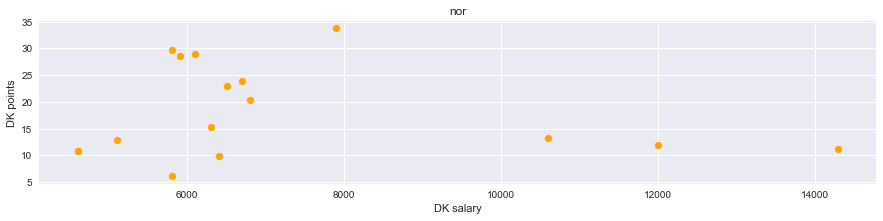

QB nyg


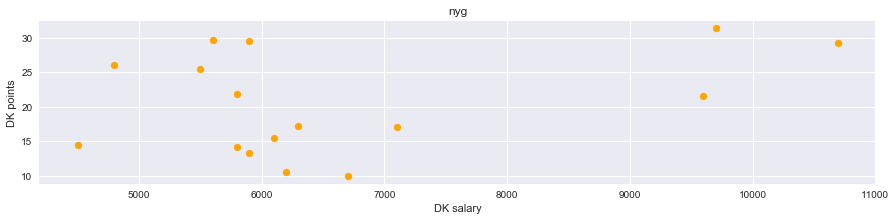

QB den


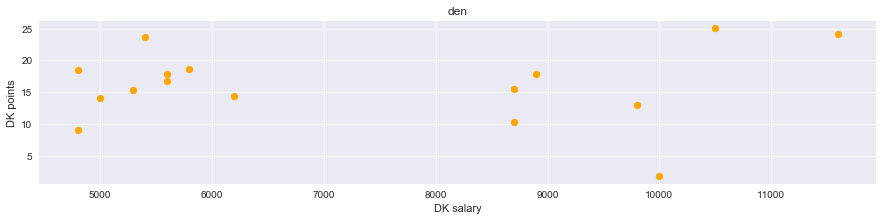

QB sdg


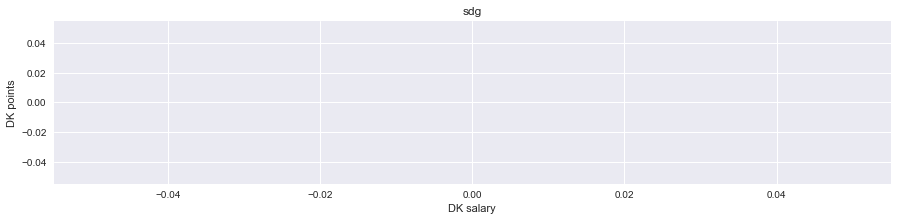

QB buf


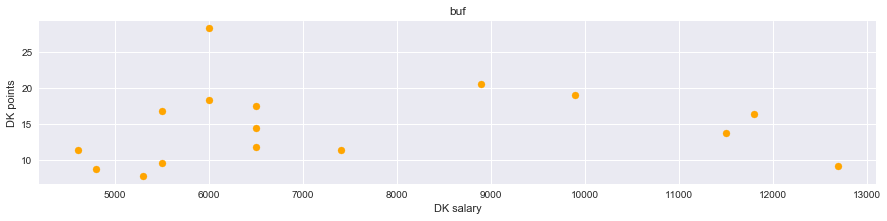

QB ind


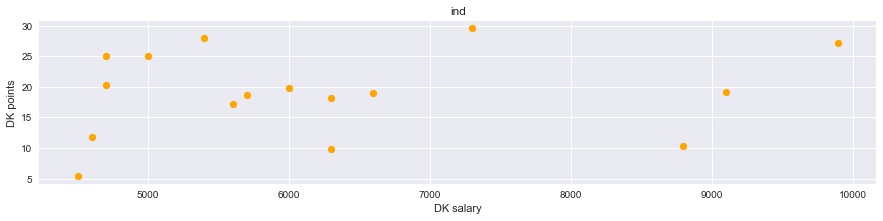

QB cle


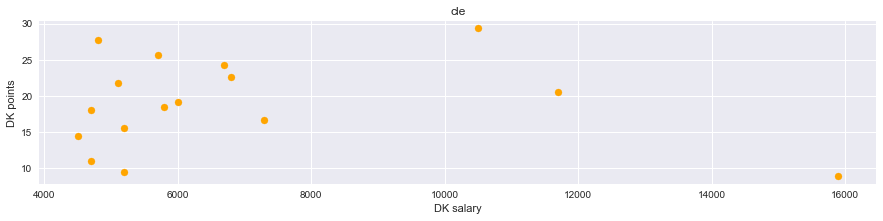

QB bal


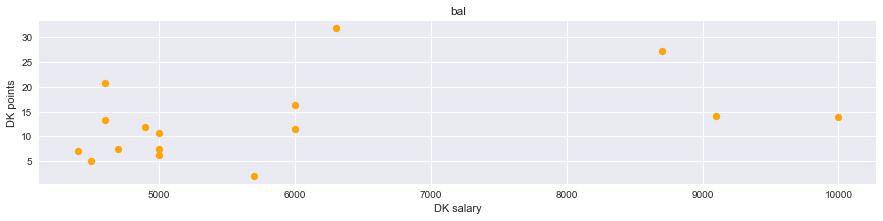

QB jac


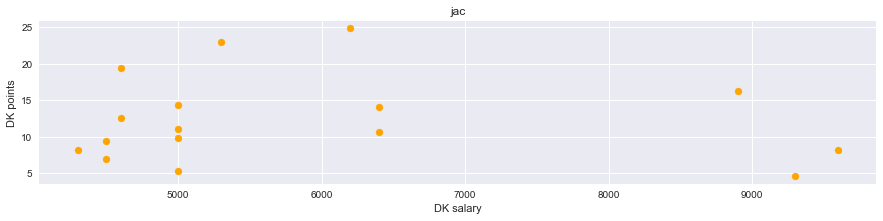

QB cin


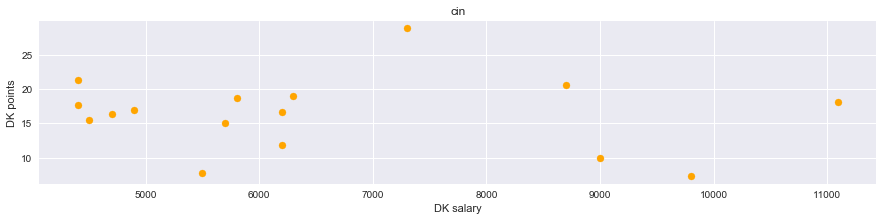

QB kan


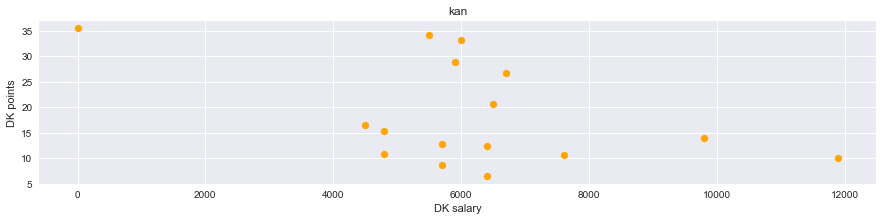

QB atl


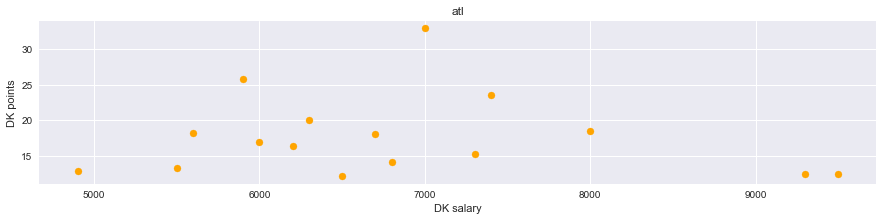

QB gnb


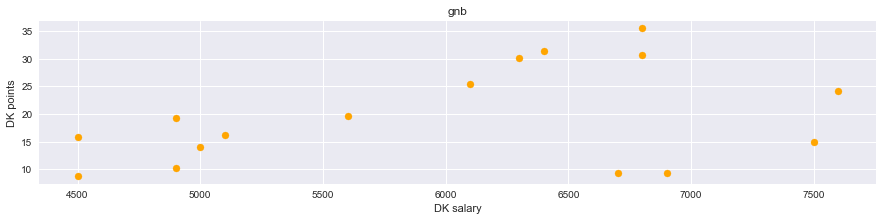

QB phi


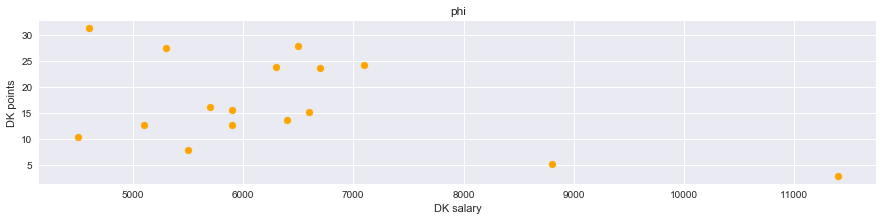

QB tam


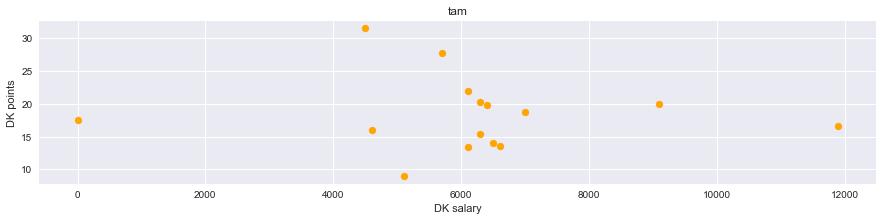

QB chi


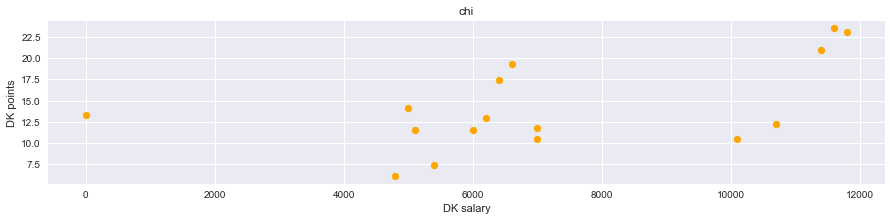

QB dal


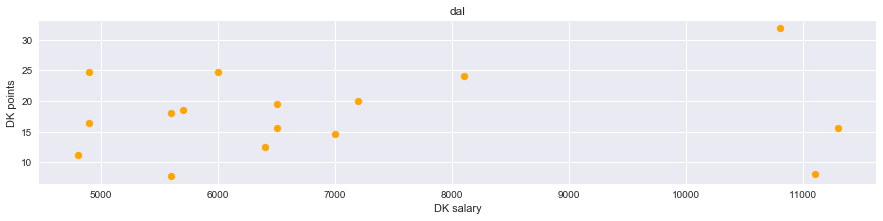

QB car


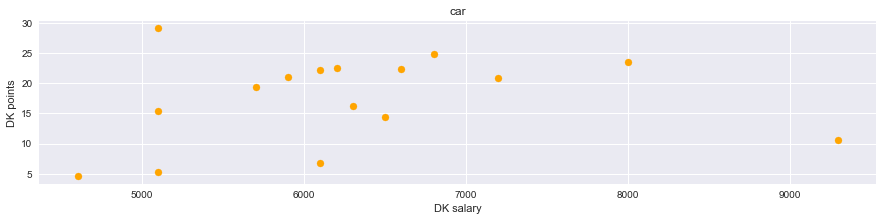

QB oak


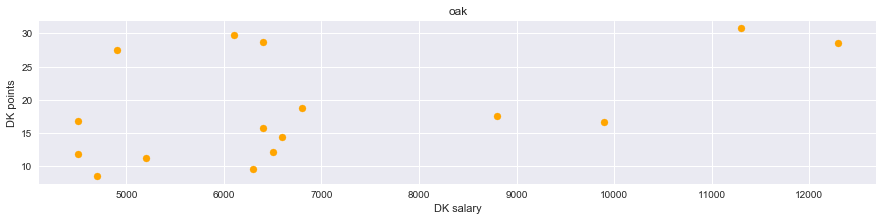

QB stl


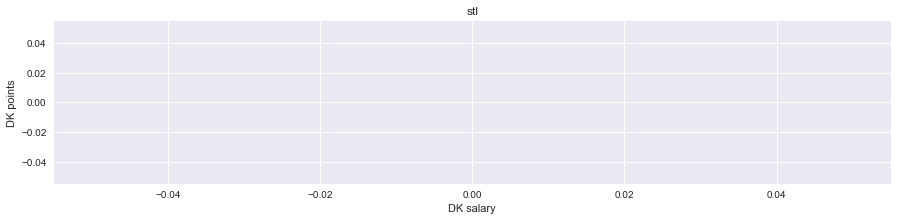

QB nyj


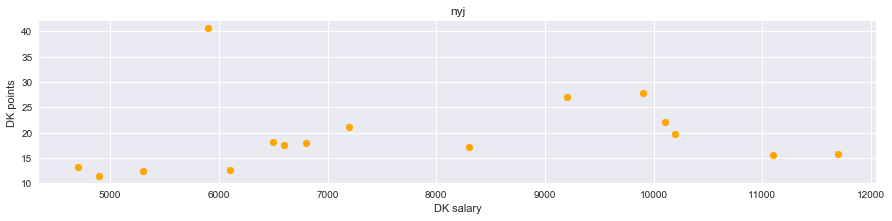

QB nwe


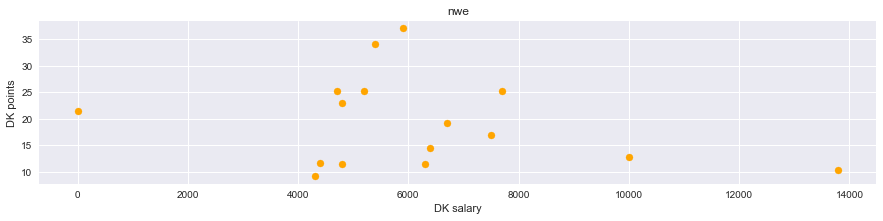

QB ari


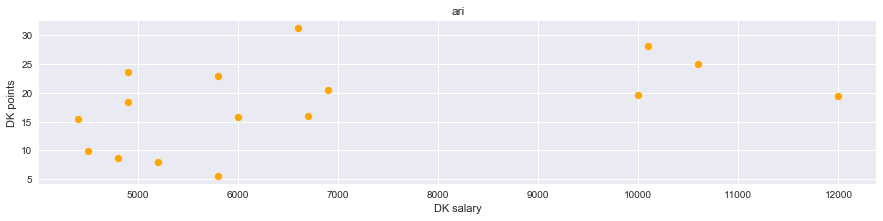

QB was


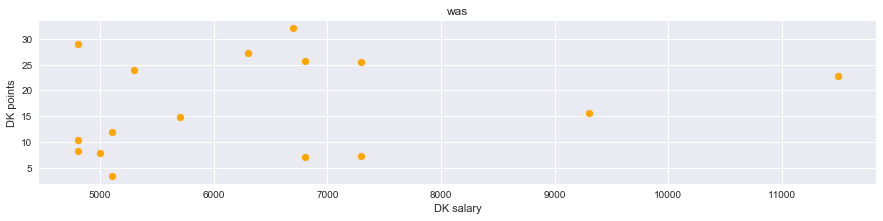

QB pit


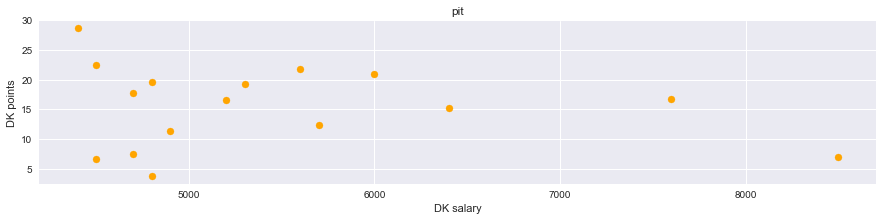

QB ten


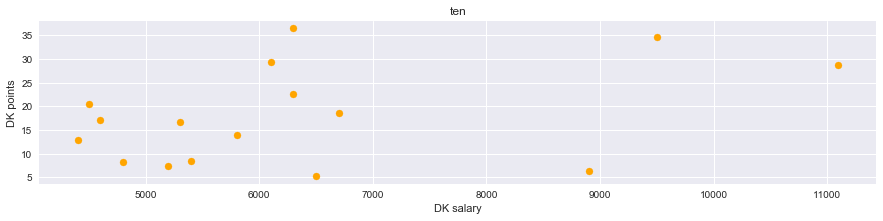

QB mia


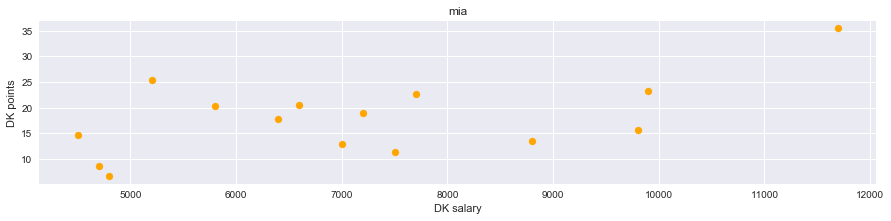

QB sfo


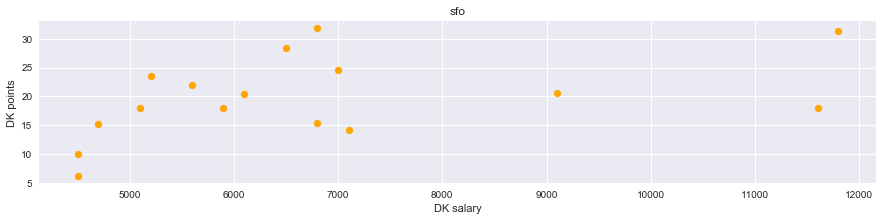

QB sea


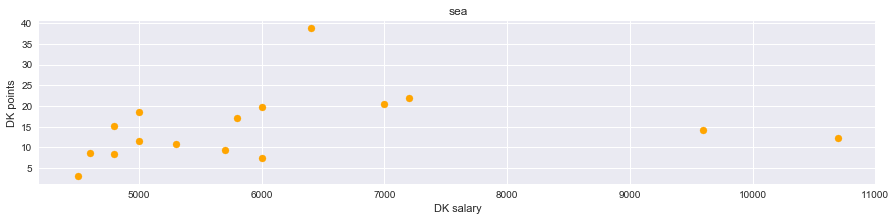

QB hou


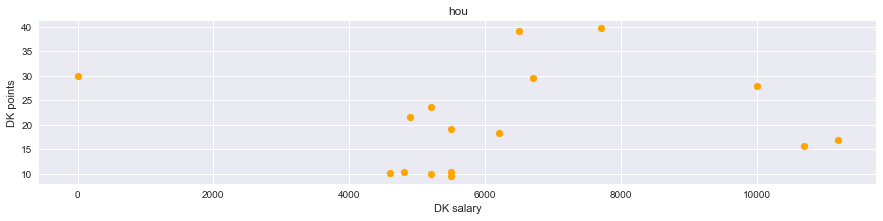

QB det


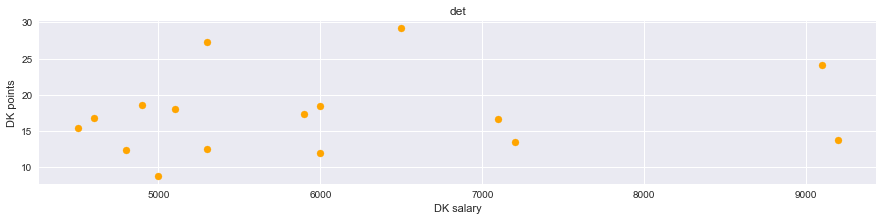

QB min


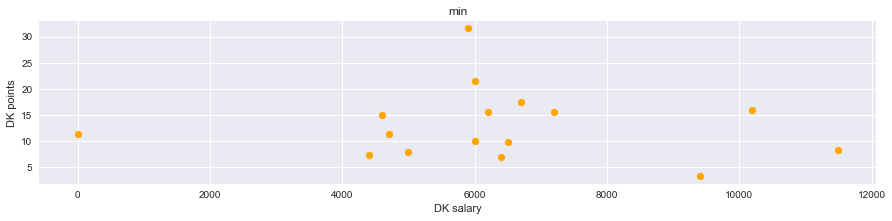

QB lar


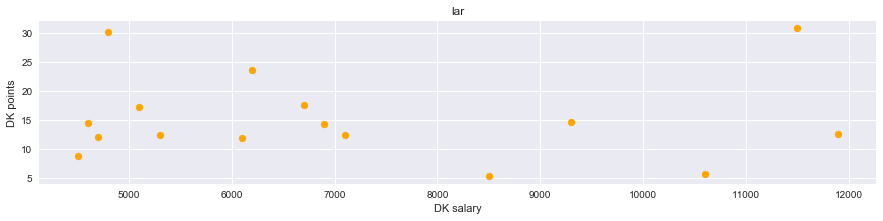

QB lac


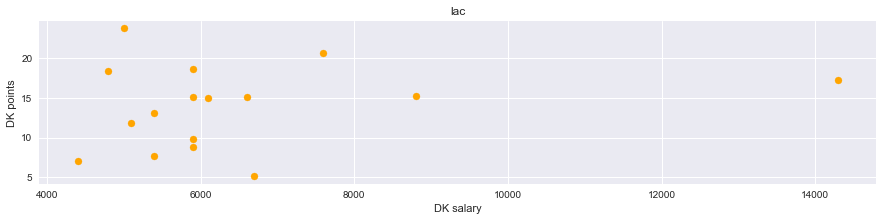

QB -


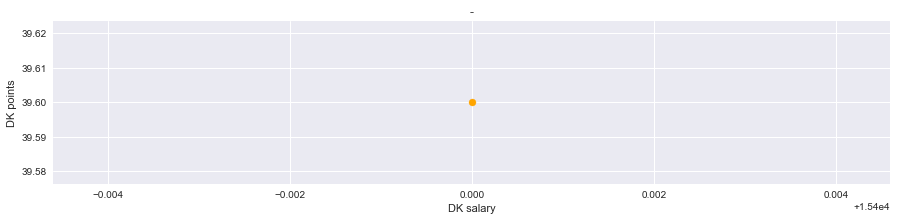

RB nor


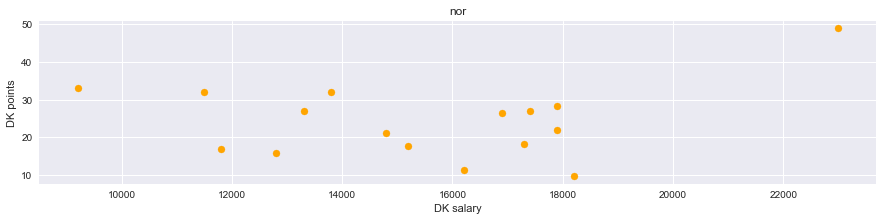

RB nyg


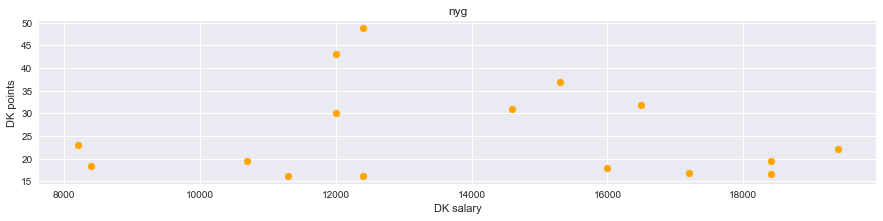

RB den


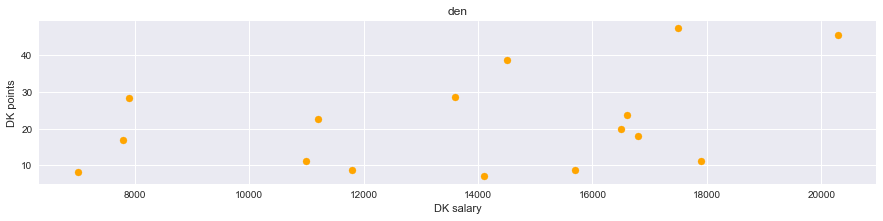

RB sdg


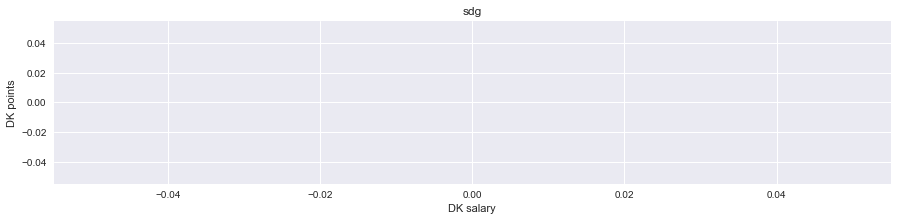

RB buf


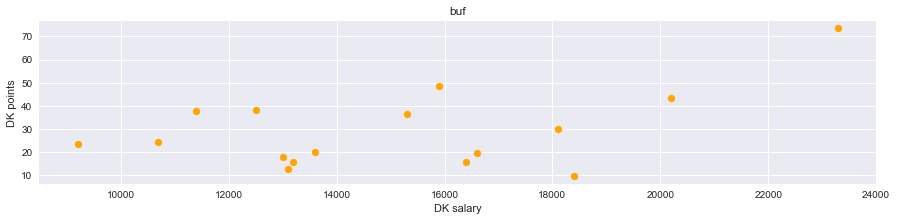

RB ind


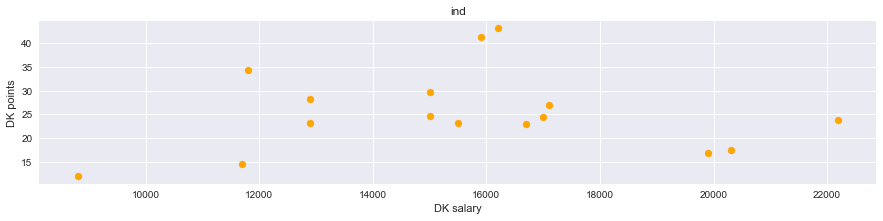

RB cle


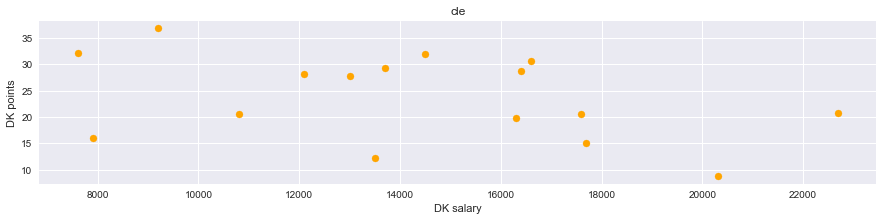

RB bal


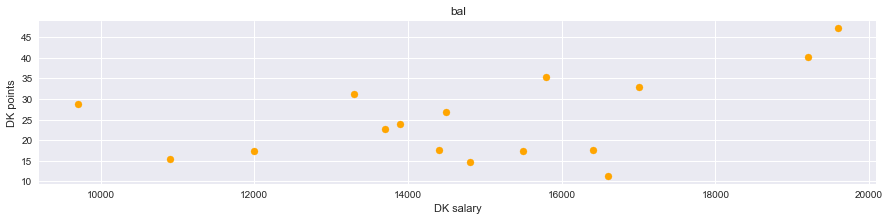

RB jac


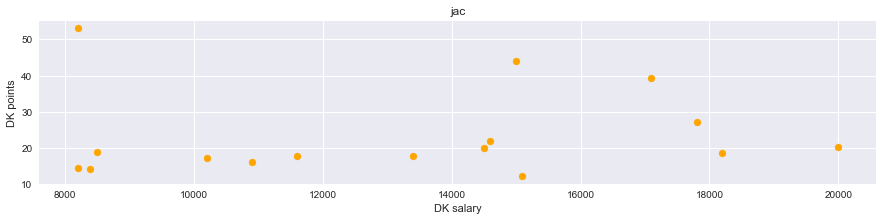

RB cin


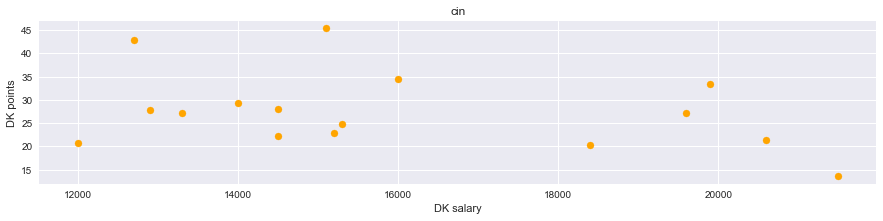

RB kan


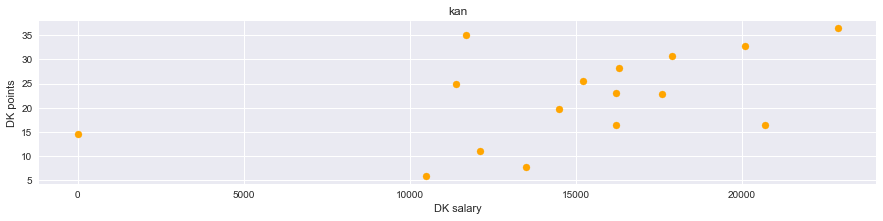

RB atl


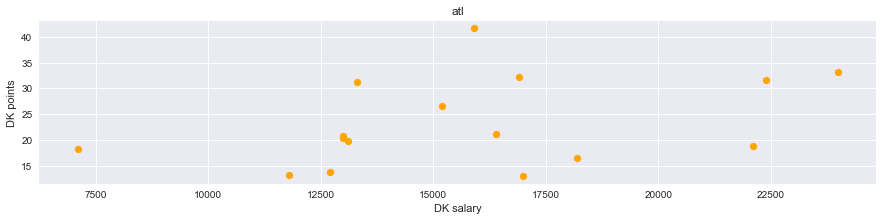

RB gnb


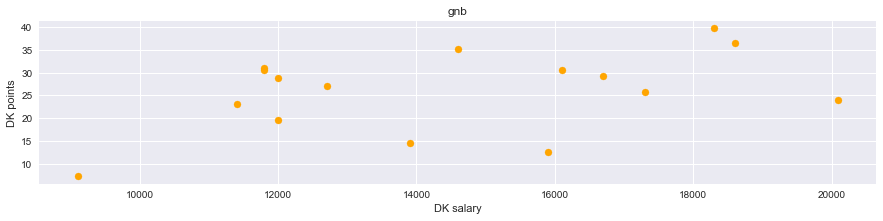

RB phi


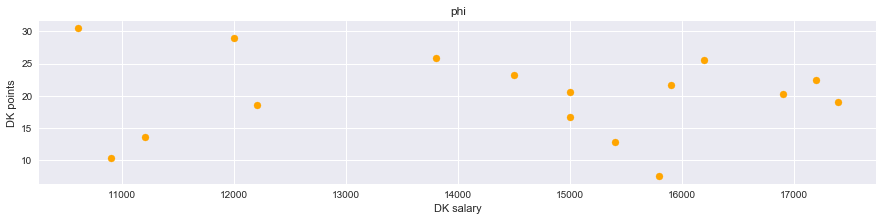

RB tam


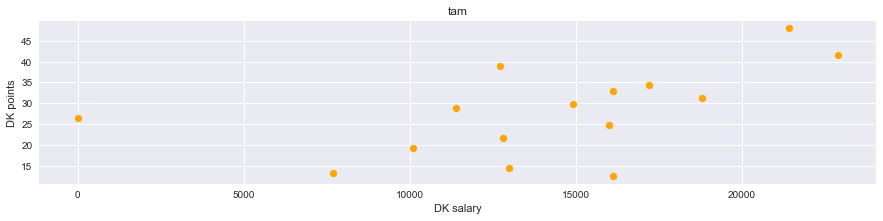

RB chi


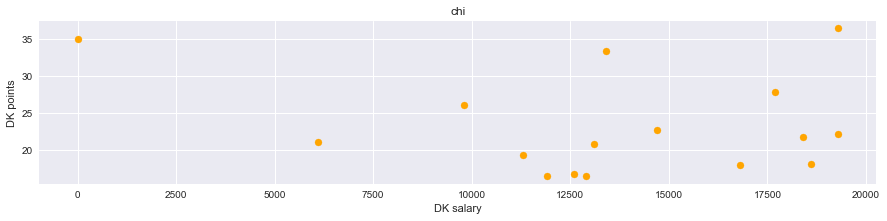

RB dal


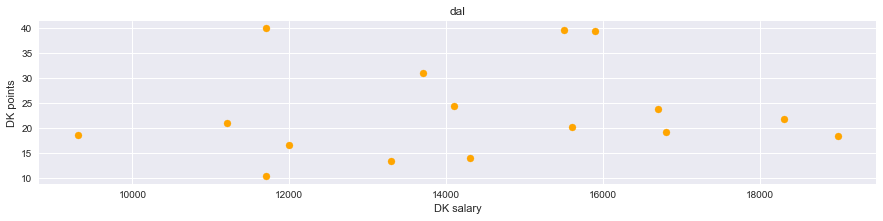

RB car


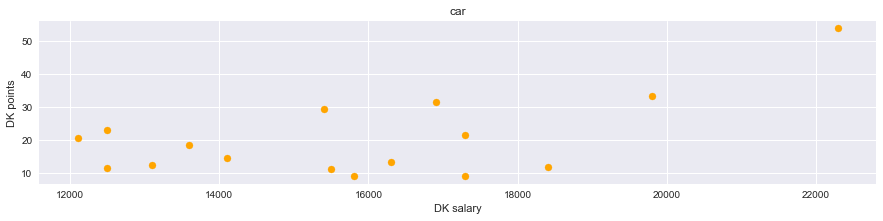

RB oak


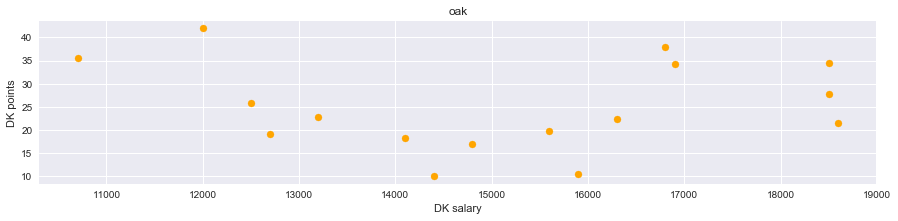

RB stl


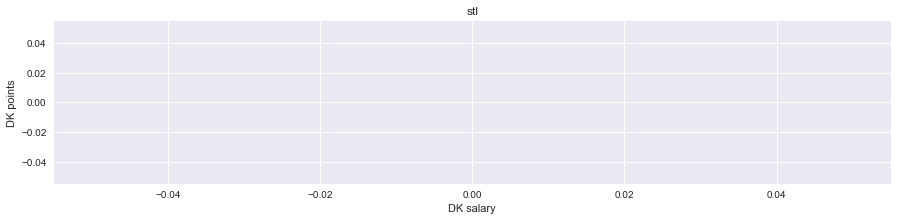

RB nyj


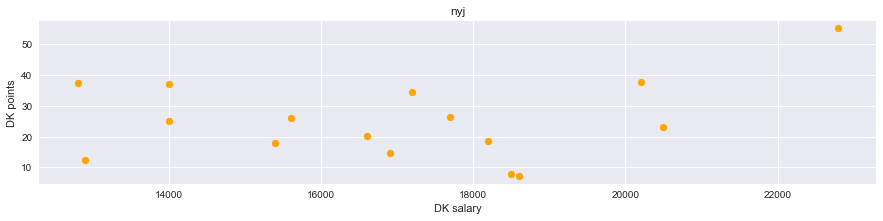

RB nwe


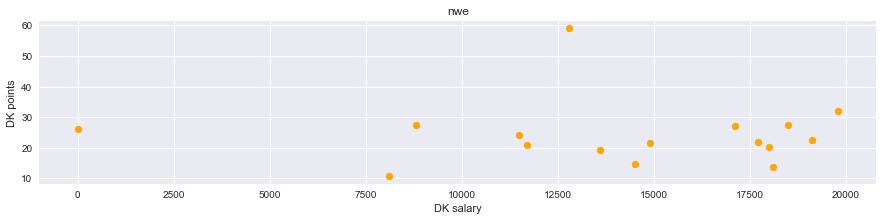

RB ari


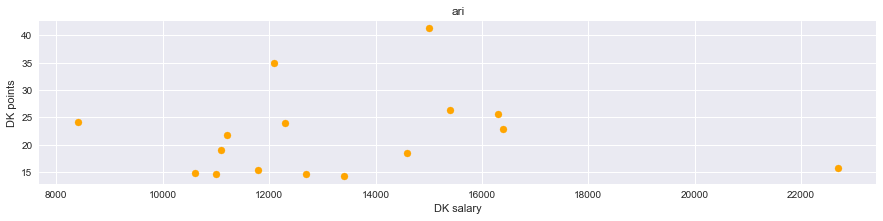

RB was


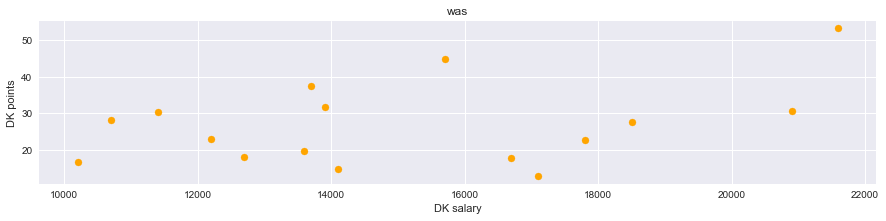

RB pit


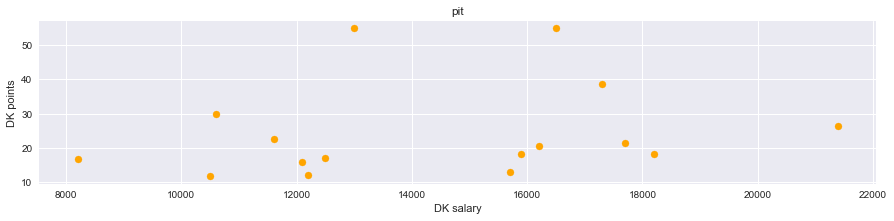

RB ten


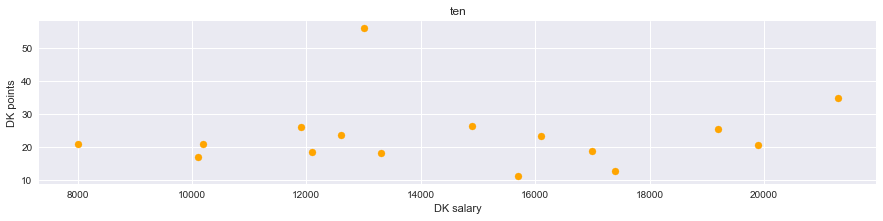

RB mia


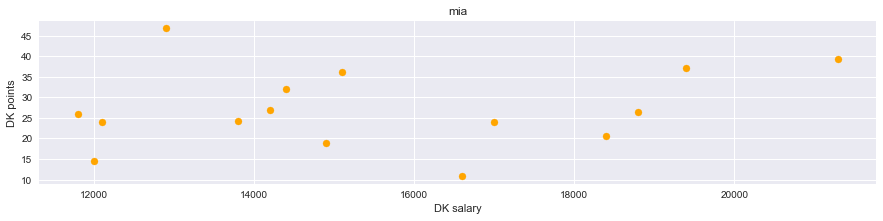

RB sfo


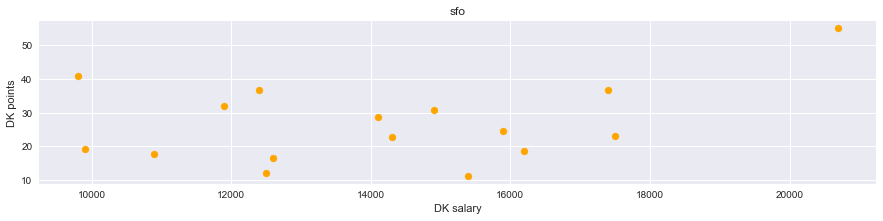

RB sea


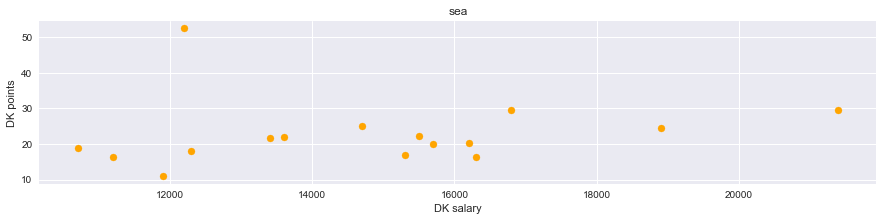

RB hou


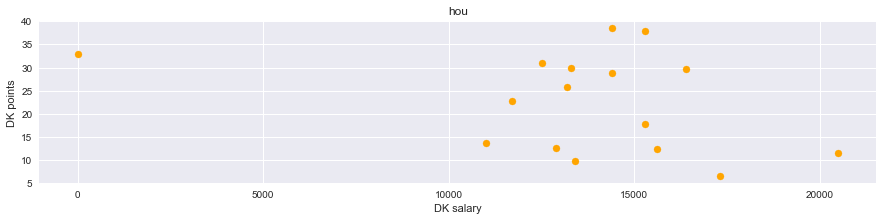

RB det


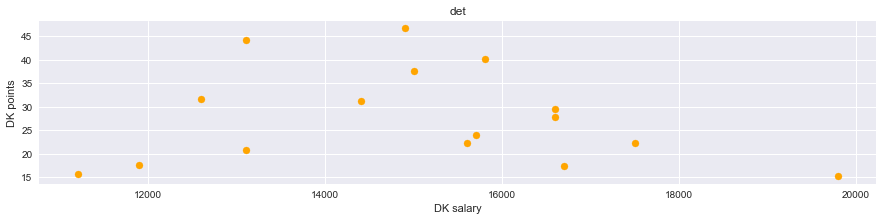

RB min


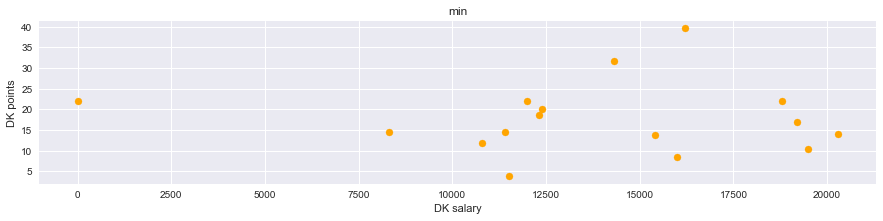

RB lar


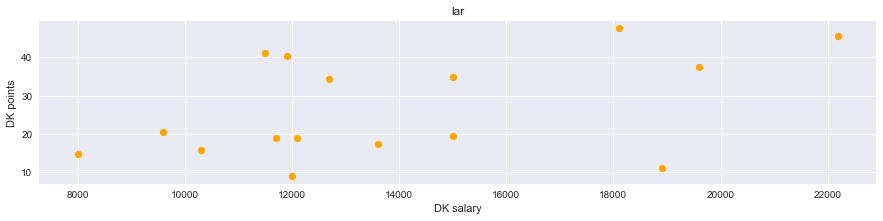

RB lac


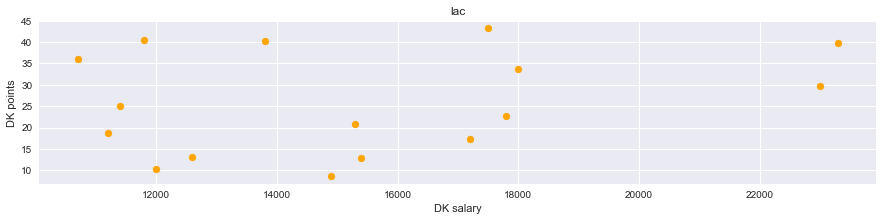

RB -


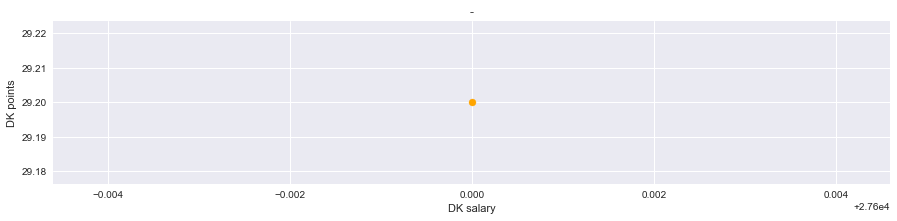

WR nor


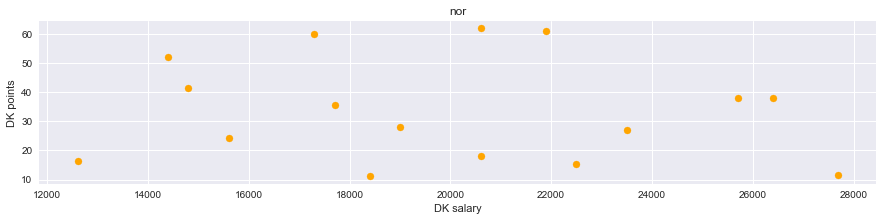

WR nyg


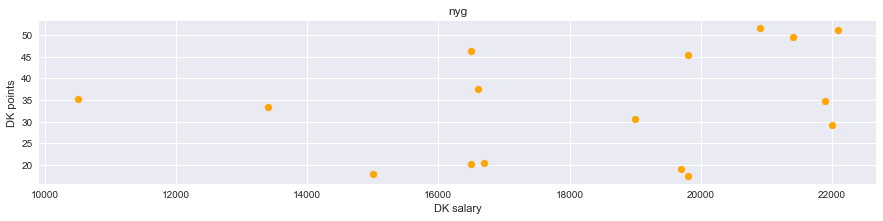

WR den


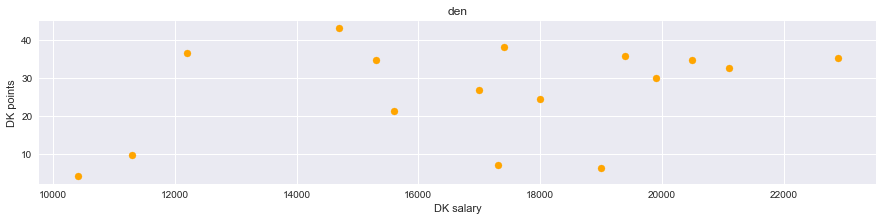

WR sdg


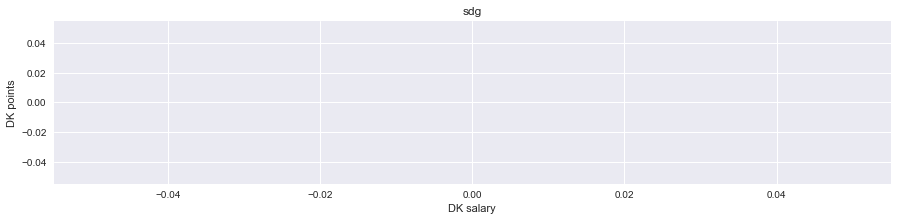

WR buf


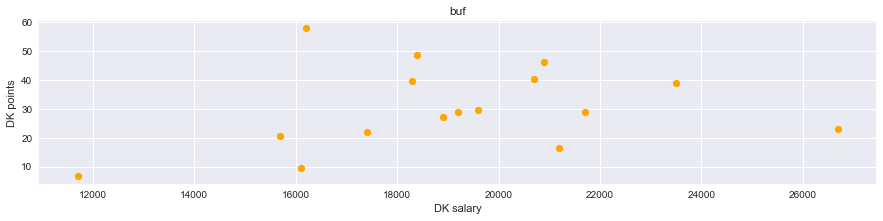

WR ind


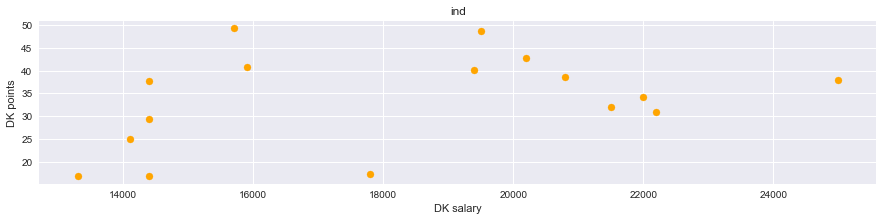

WR cle


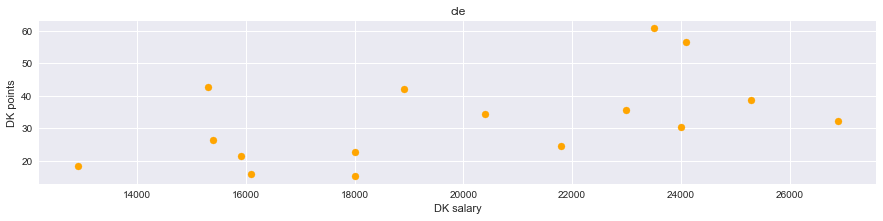

WR bal


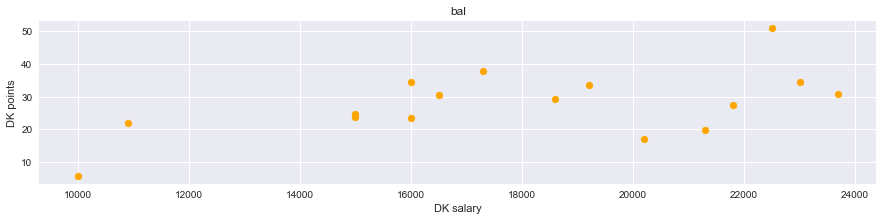

WR jac


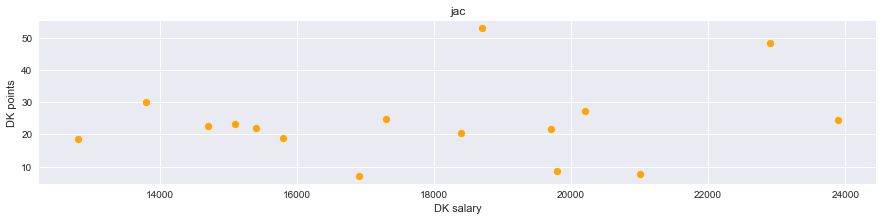

WR cin


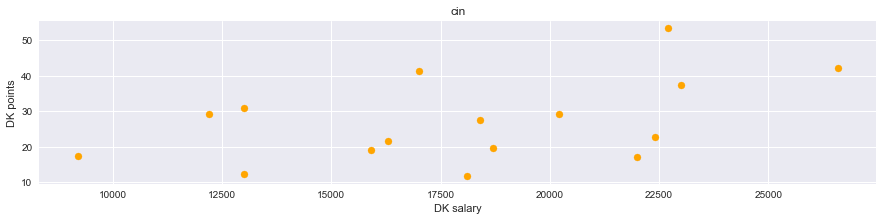

WR kan


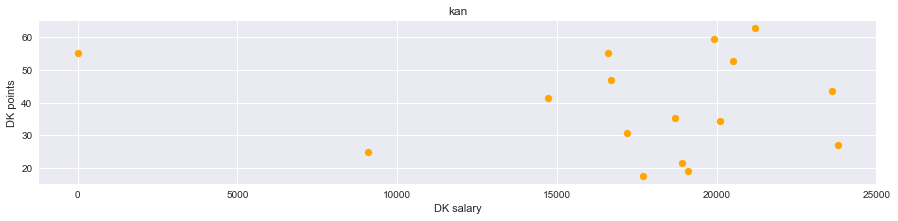

WR atl


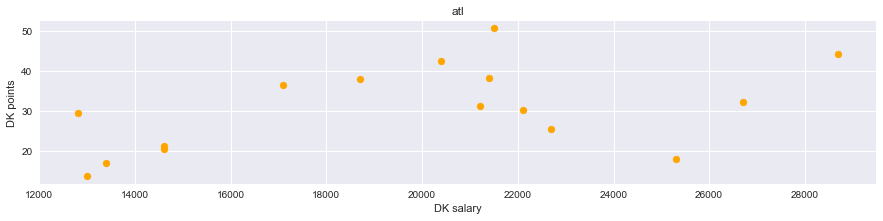

WR gnb


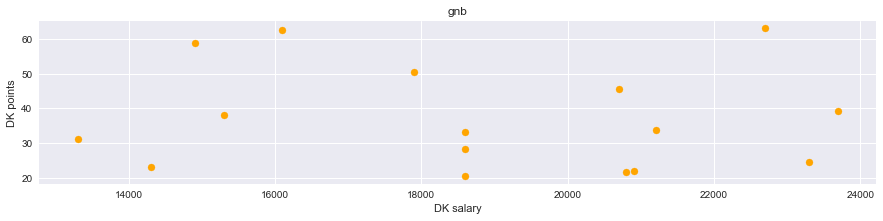

WR phi


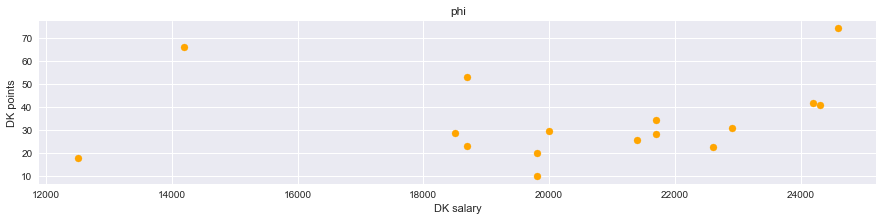

WR tam


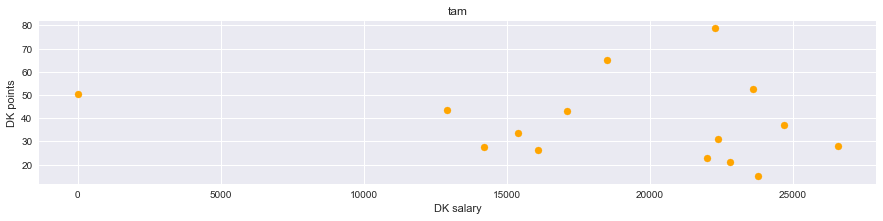

WR chi


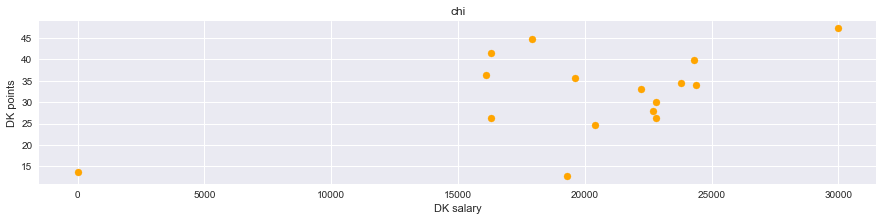

WR dal


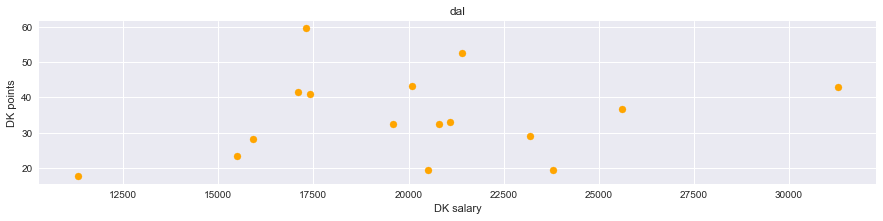

WR car


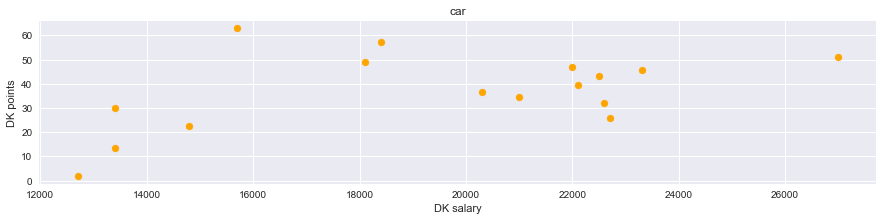

WR oak


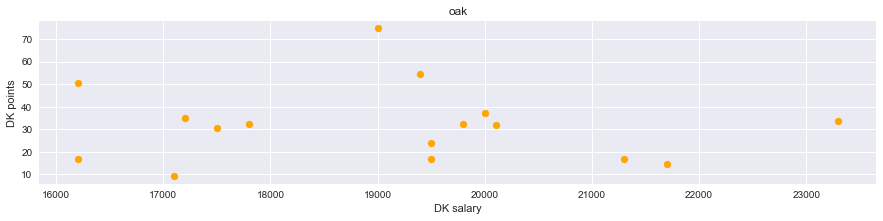

WR stl


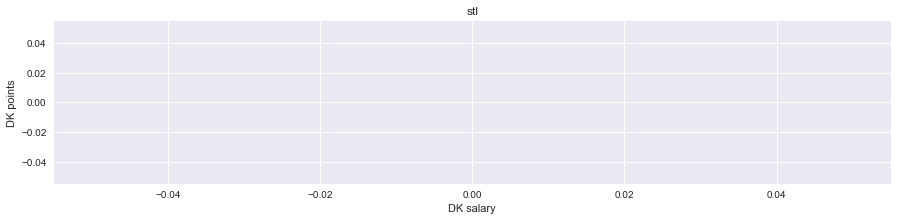

WR nyj


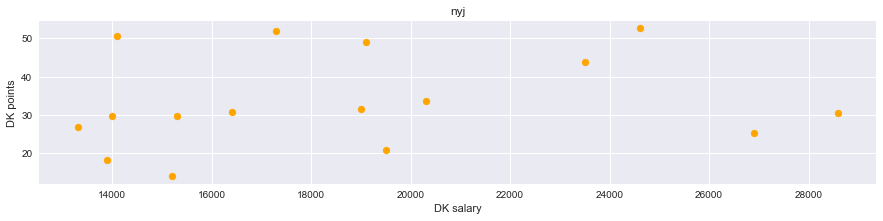

WR nwe


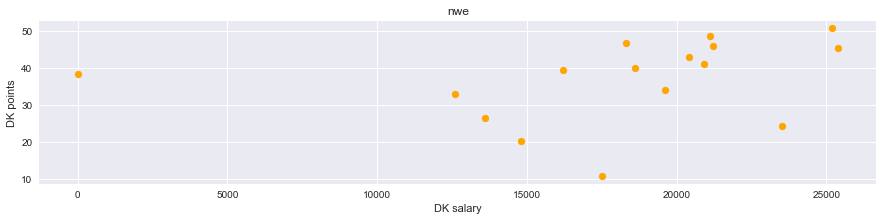

WR ari


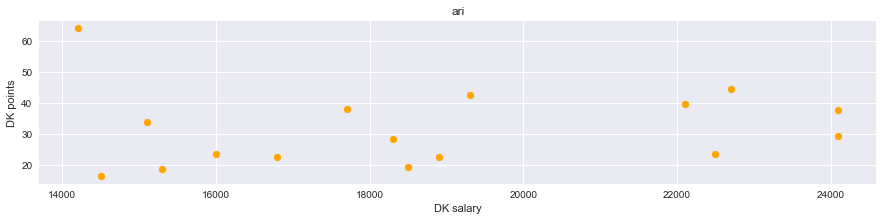

WR was


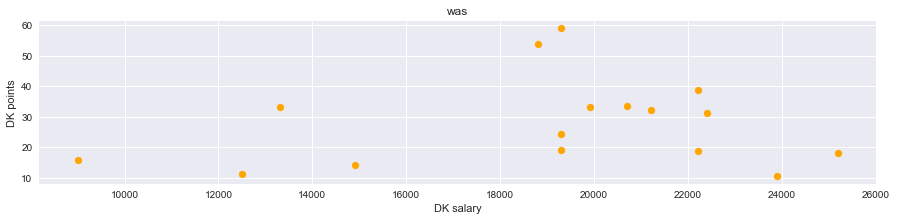

WR pit


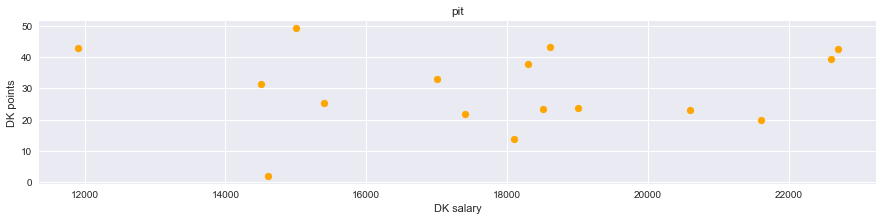

WR ten


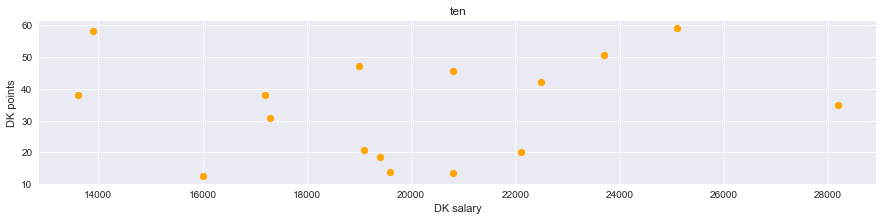

WR mia


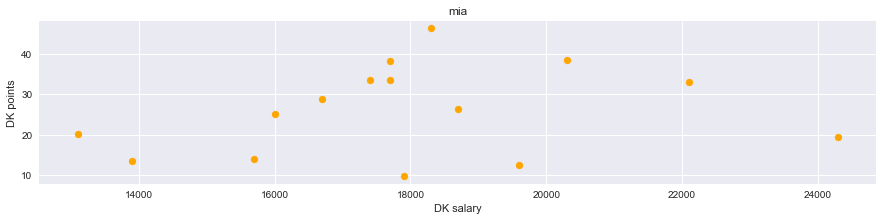

WR sfo


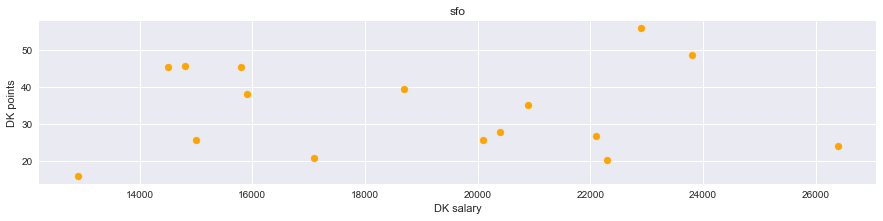

WR sea


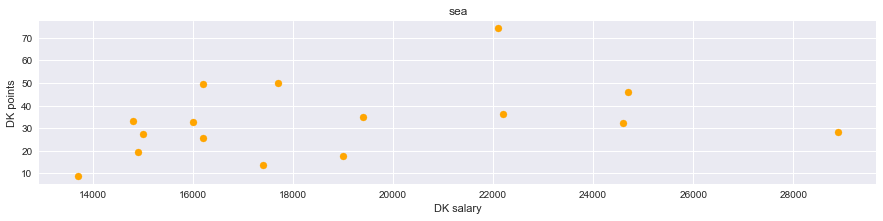

WR hou


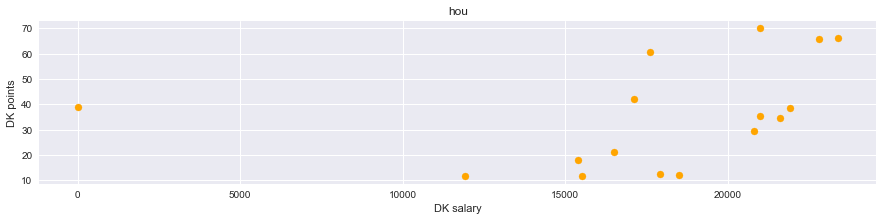

WR det


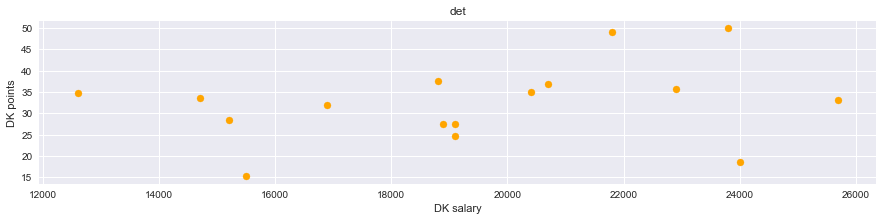

WR min


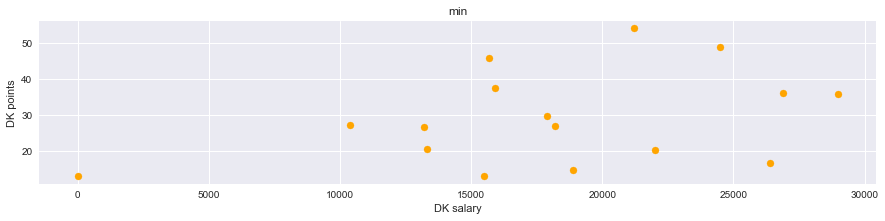

WR lar


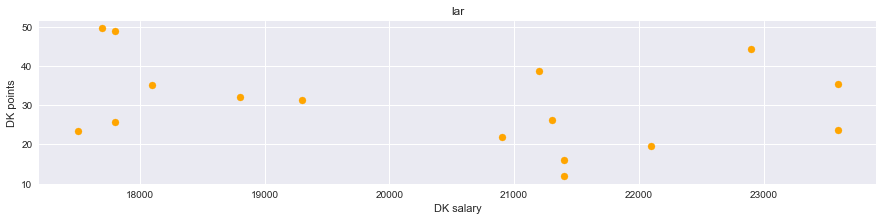

WR lac


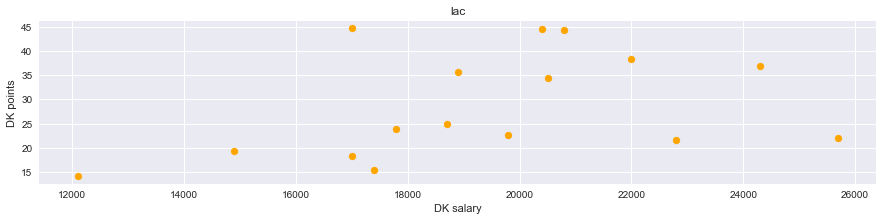

WR -


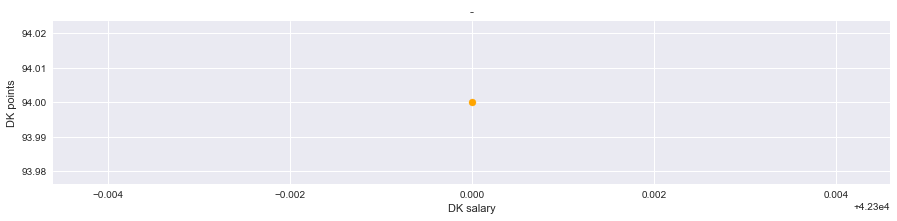

TE nor


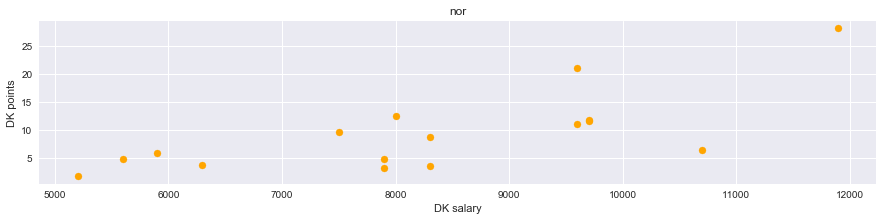

TE nyg


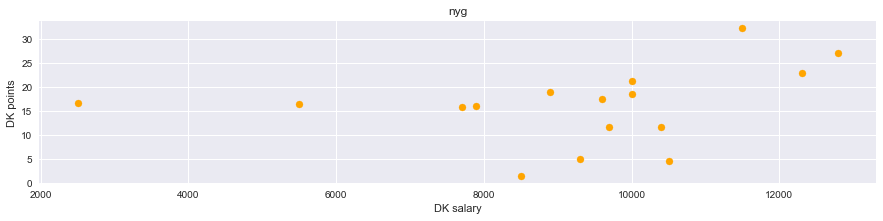

TE den


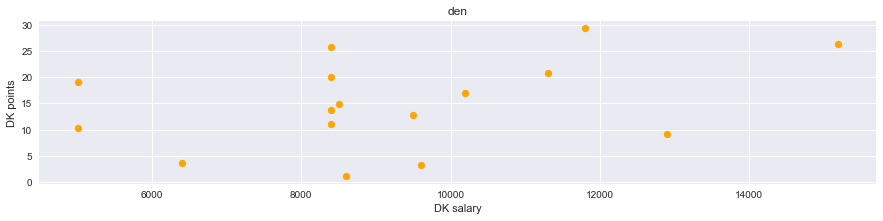

TE sdg


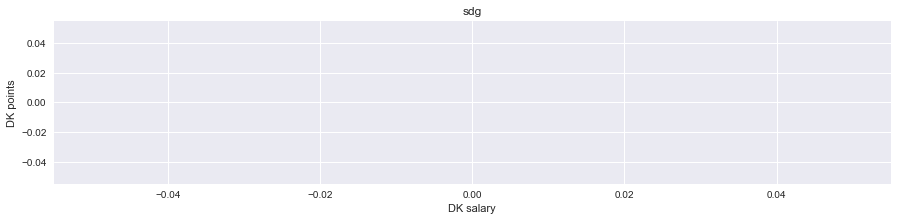

TE buf


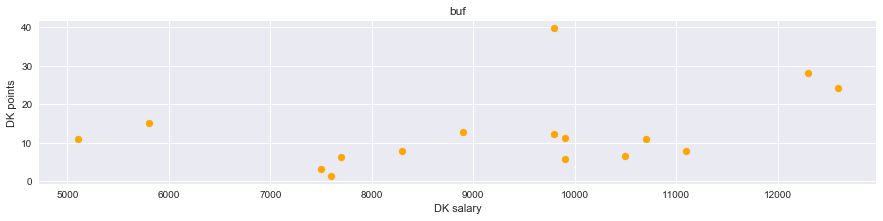

TE ind


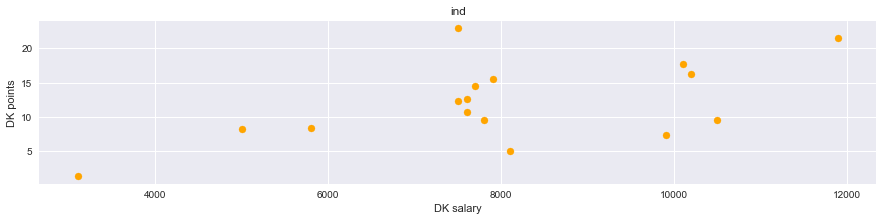

TE cle


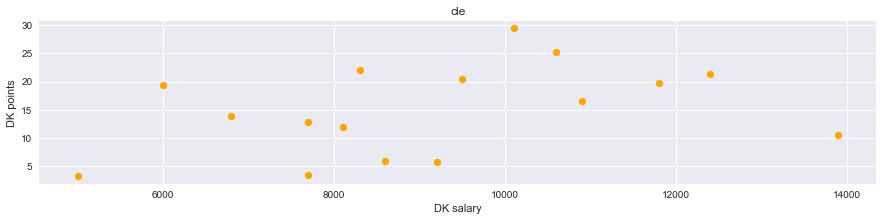

TE bal


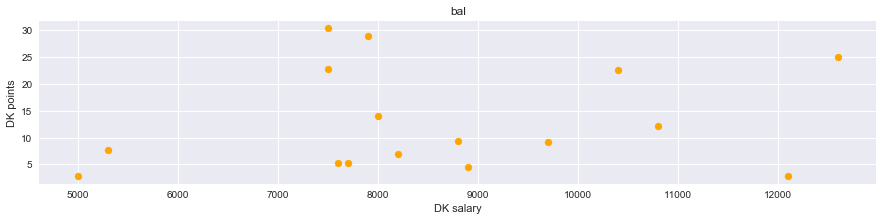

TE jac


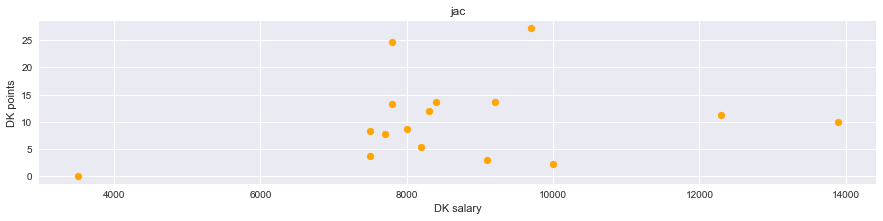

TE cin


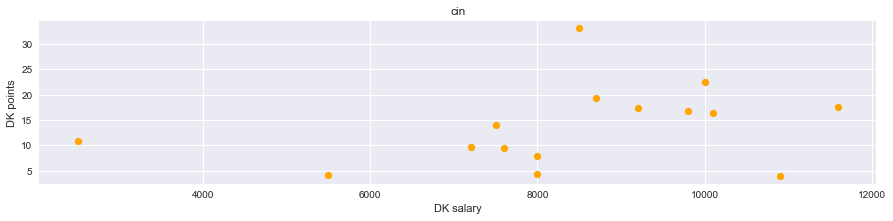

TE kan


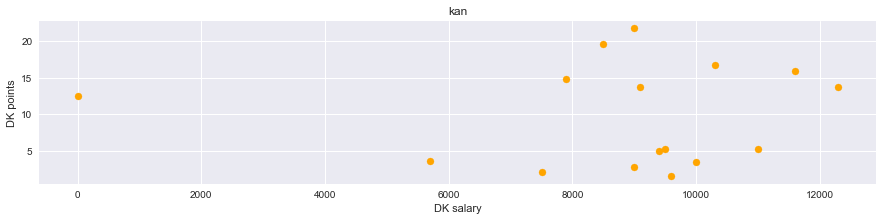

TE atl


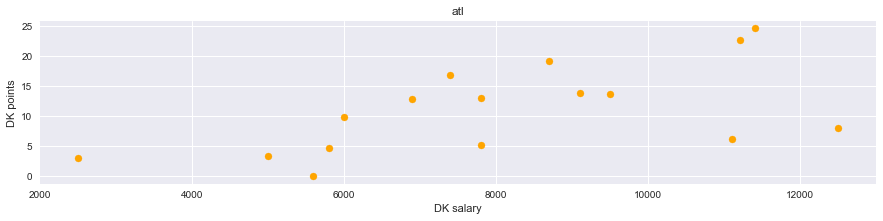

TE gnb


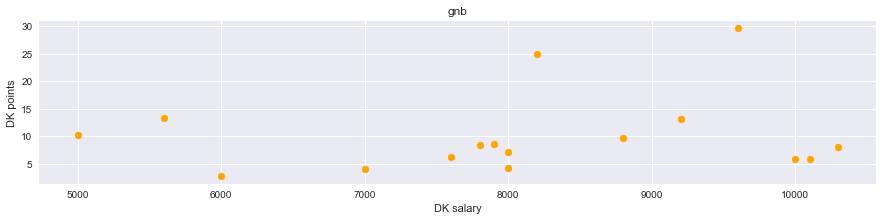

TE phi


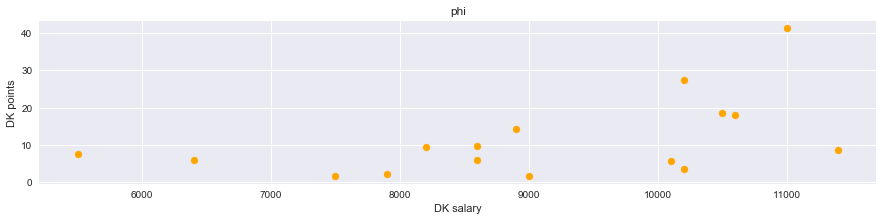

TE tam


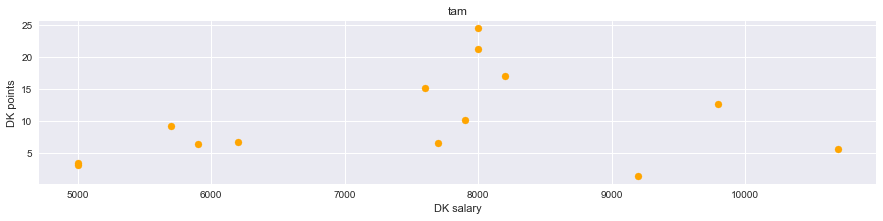

TE chi


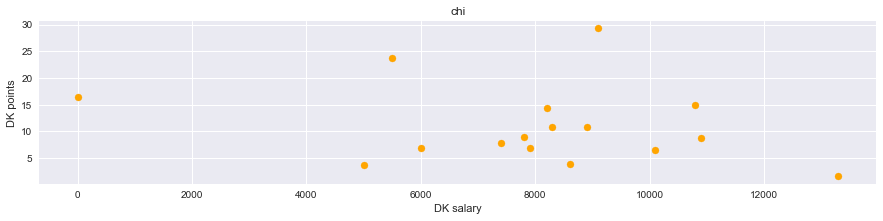

TE dal


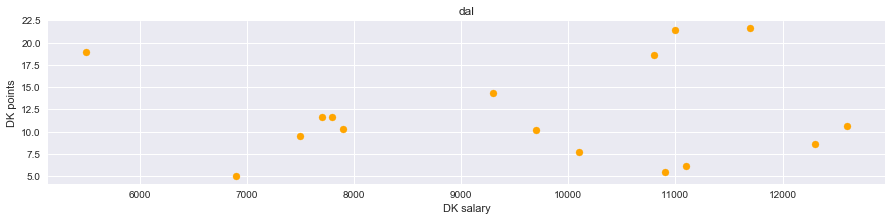

TE car


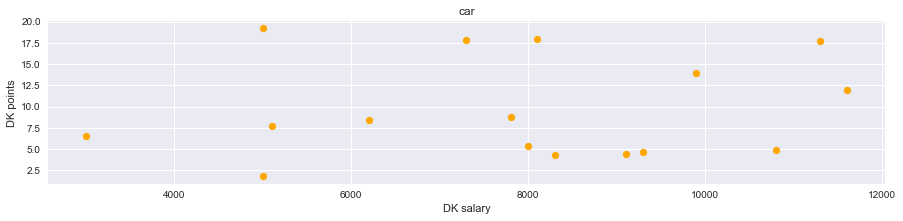

TE oak


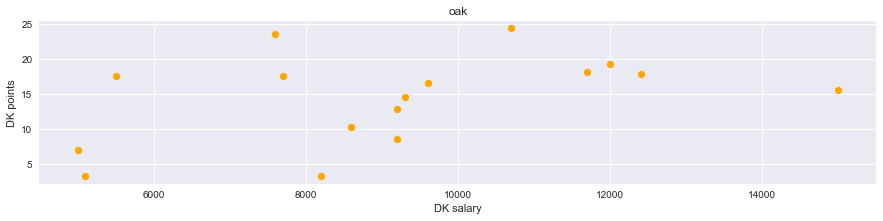

TE stl


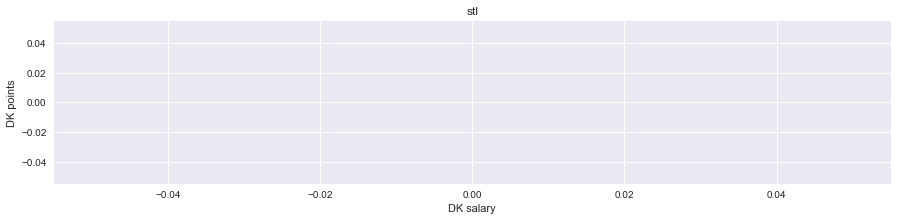

TE nyj


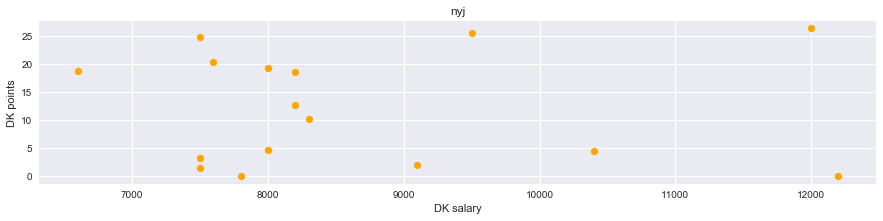

TE nwe


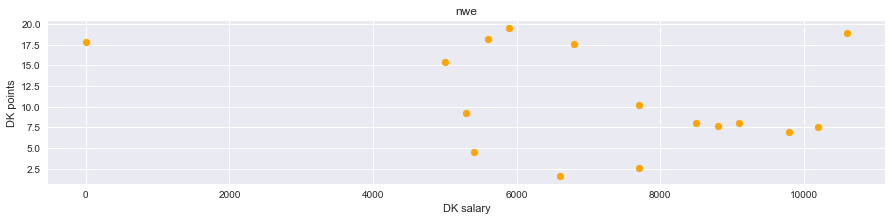

TE ari


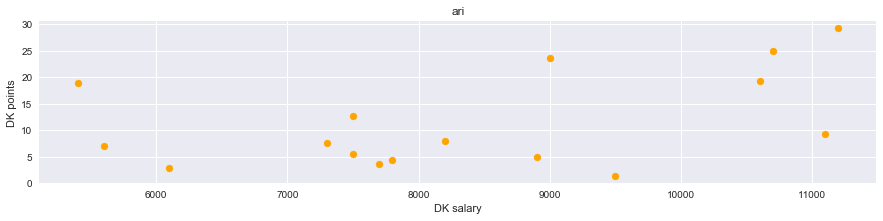

TE was


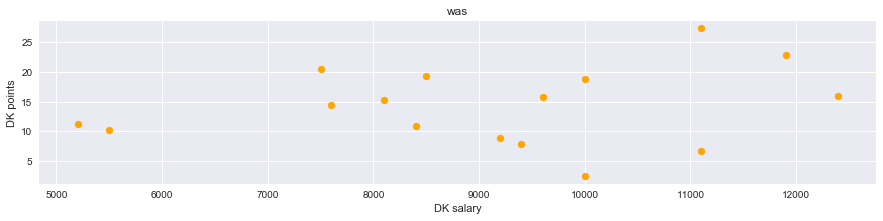

TE pit


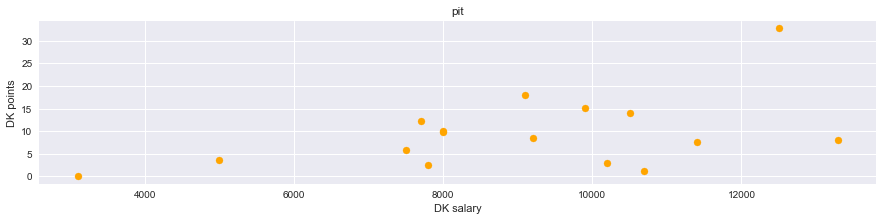

TE ten


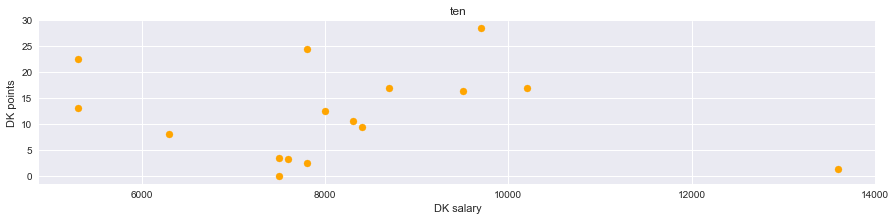

TE mia


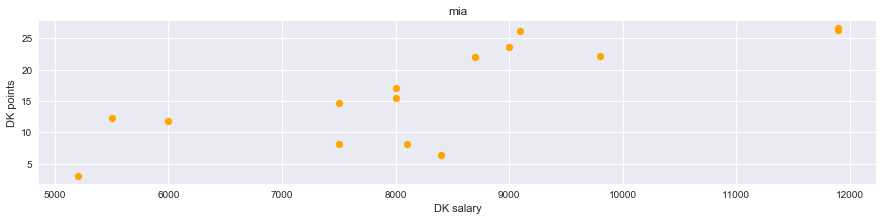

TE sfo


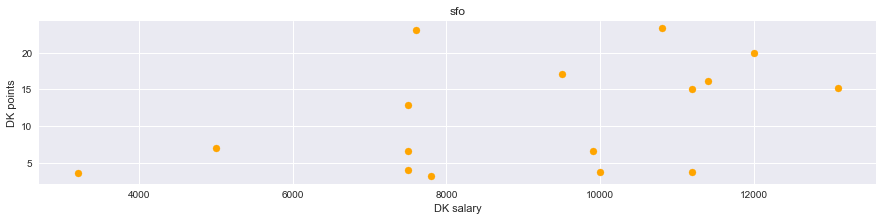

TE sea


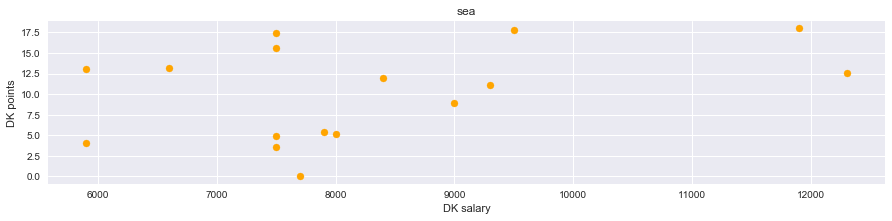

TE hou


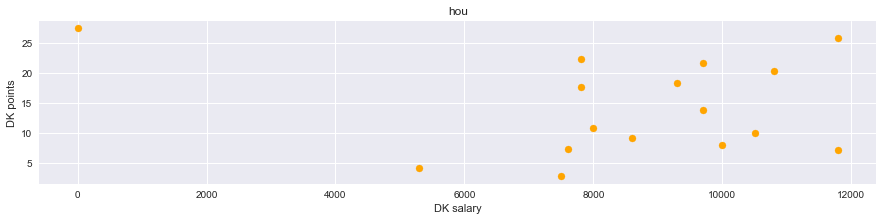

TE det


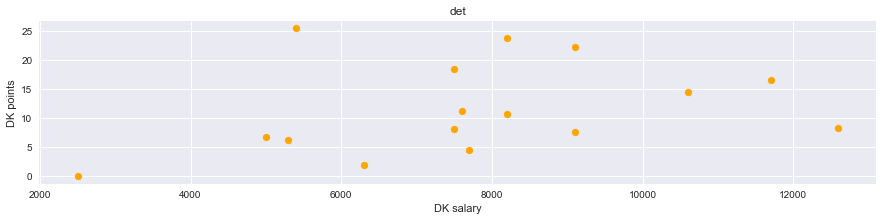

TE min


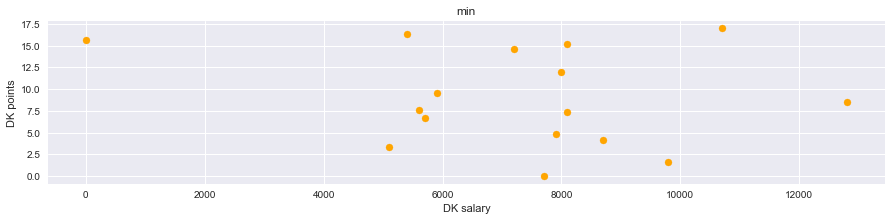

TE lar


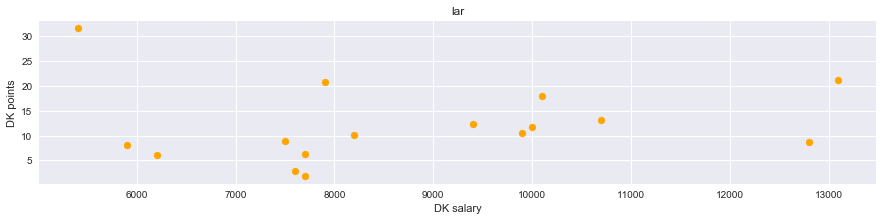

TE lac


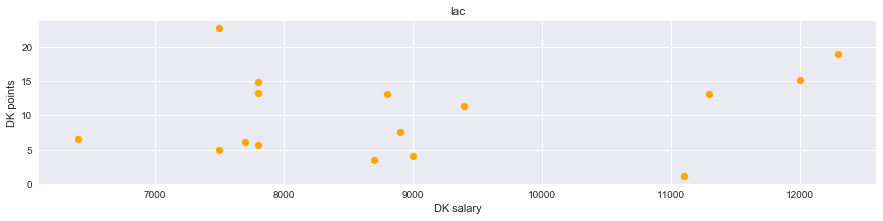

TE -


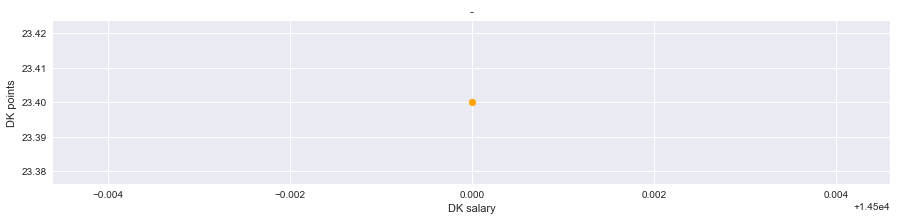

Def nor


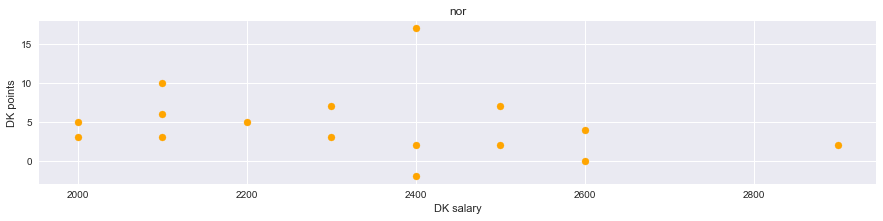

Def nyg


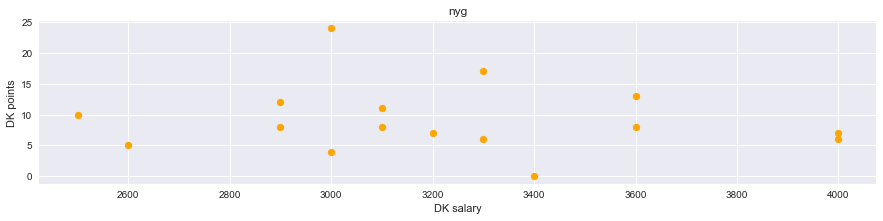

Def den


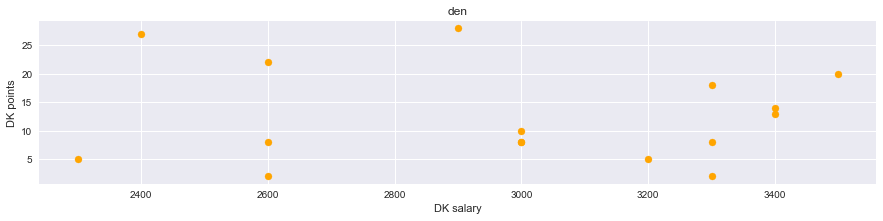

Def sdg


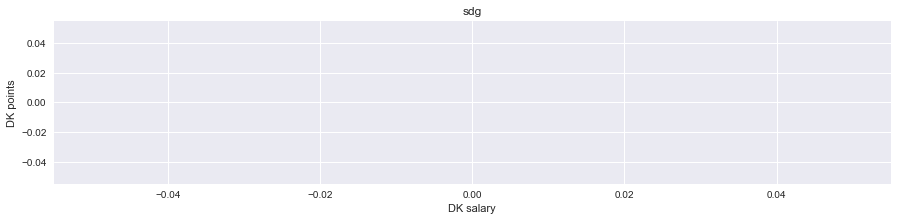

Def buf


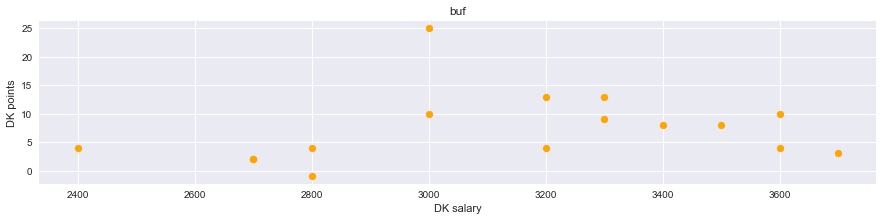

Def ind


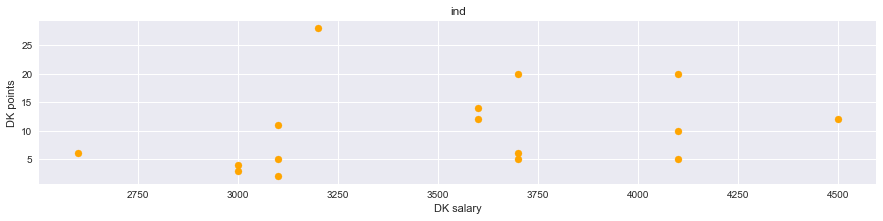

Def cle


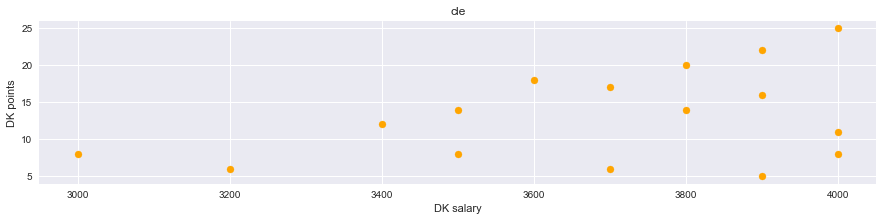

Def bal


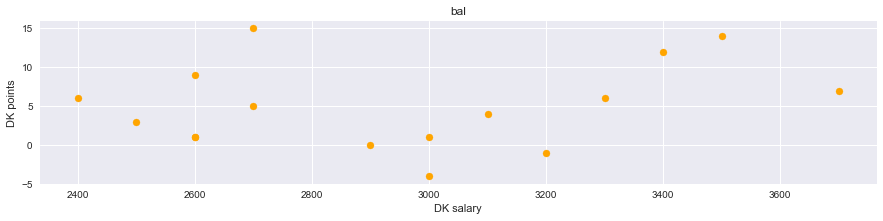

Def jac


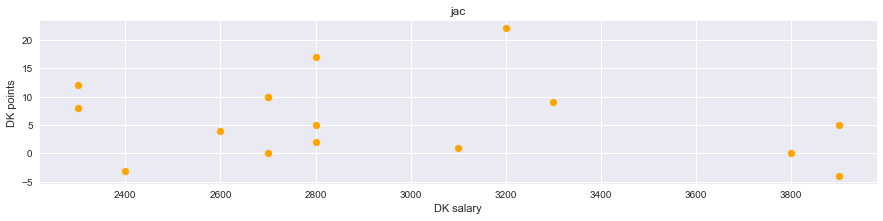

Def cin


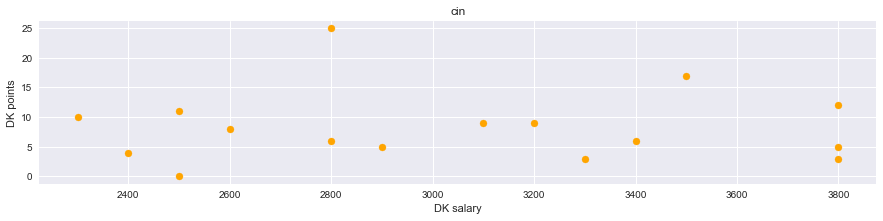

Def kan


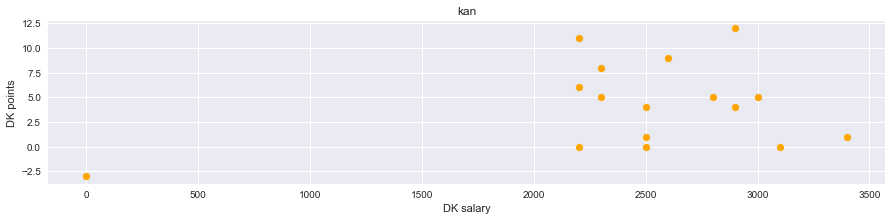

Def atl


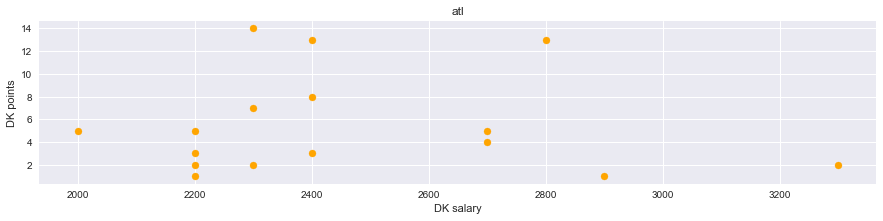

Def gnb


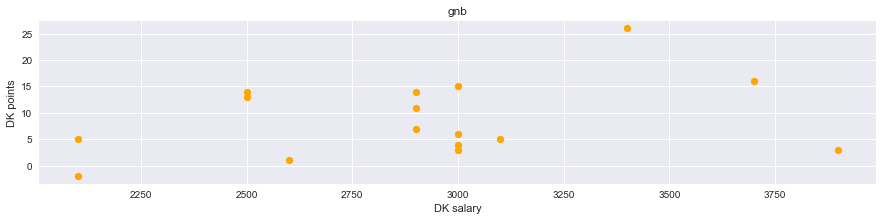

Def phi


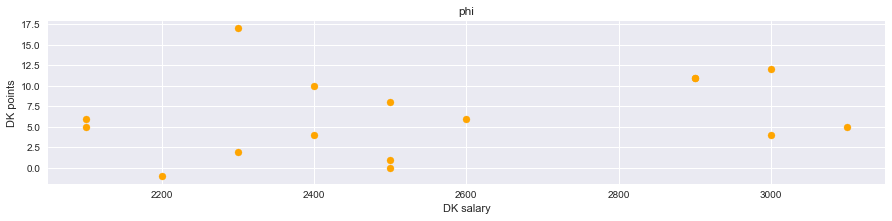

Def tam


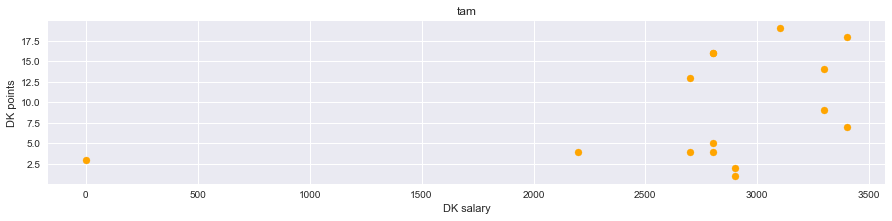

Def chi


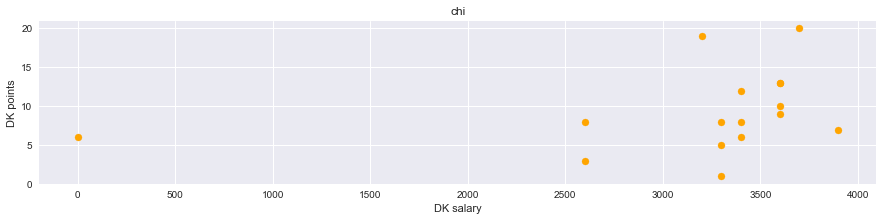

Def dal


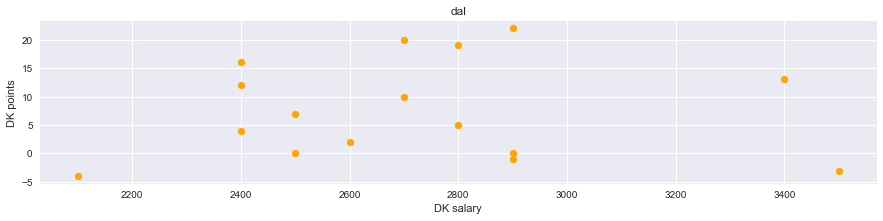

Def car


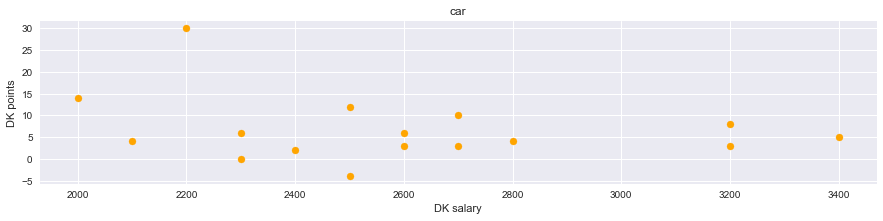

Def oak


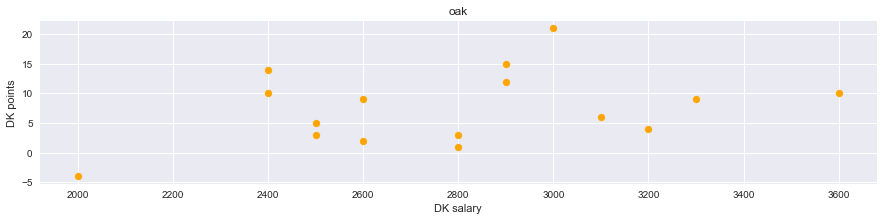

Def stl


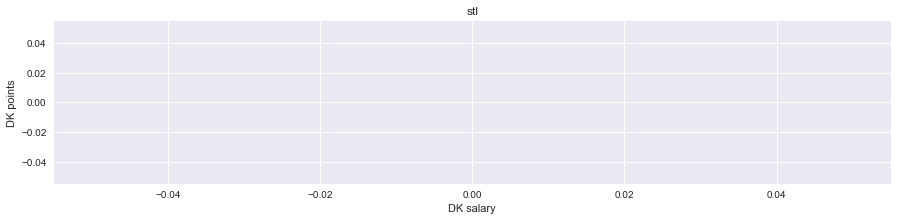

Def nyj


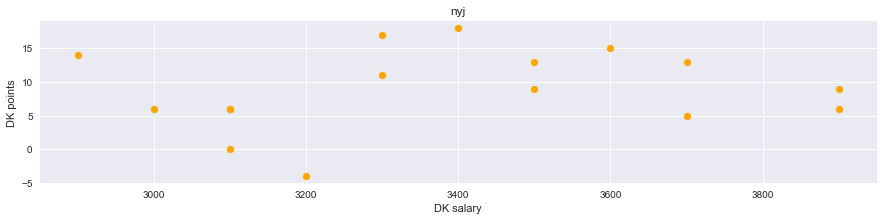

Def nwe


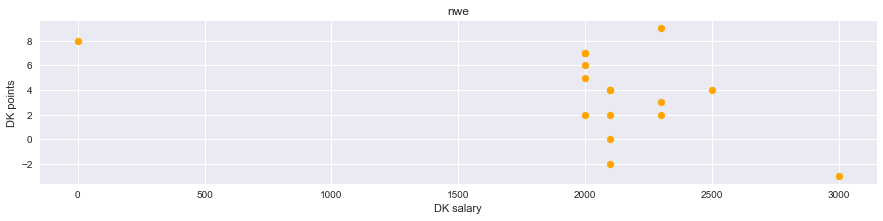

Def ari


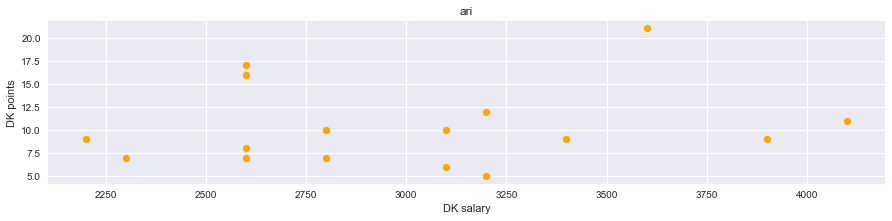

Def was


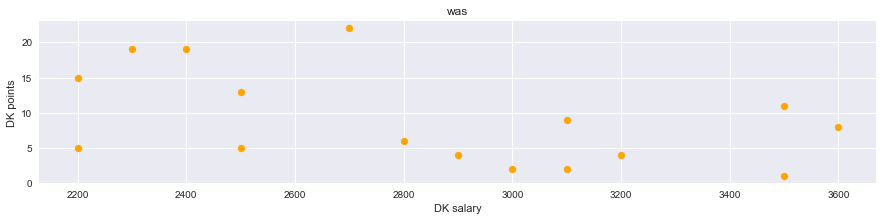

Def pit


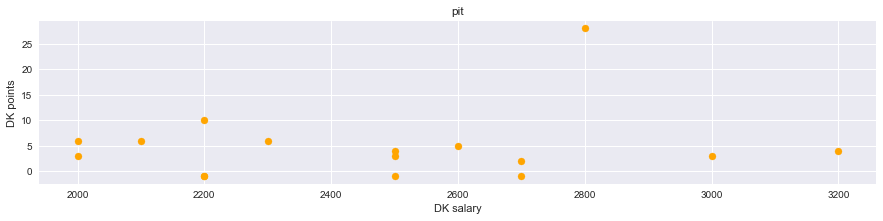

Def ten


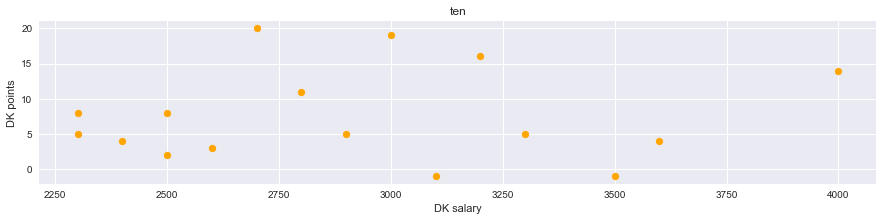

Def mia


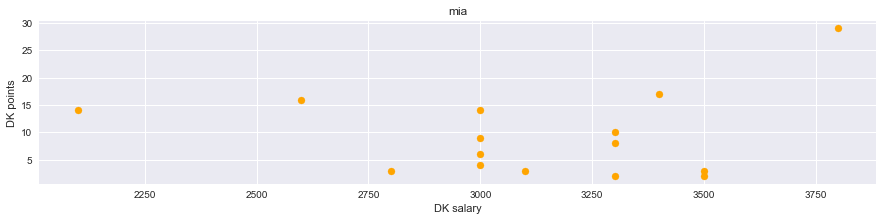

Def sfo


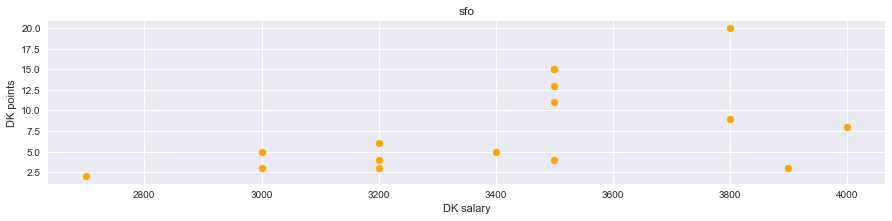

Def sea


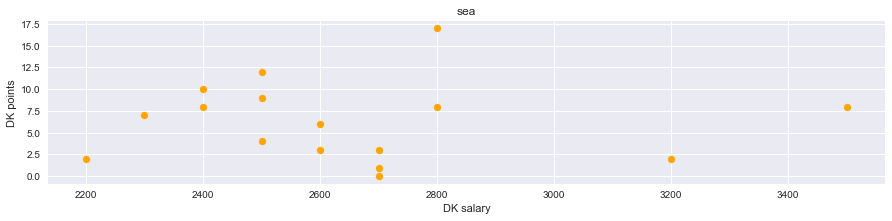

Def hou


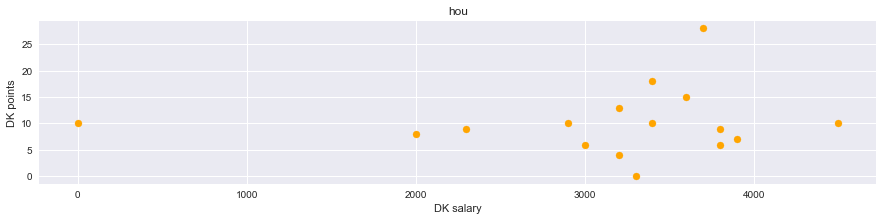

Def det


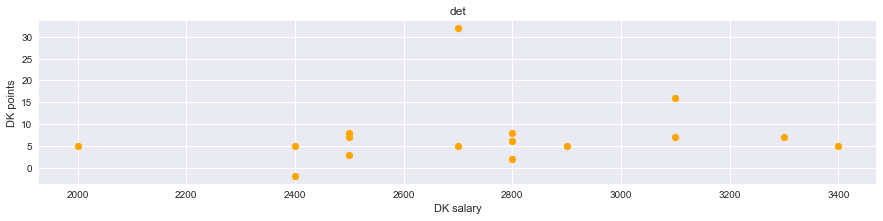

Def min


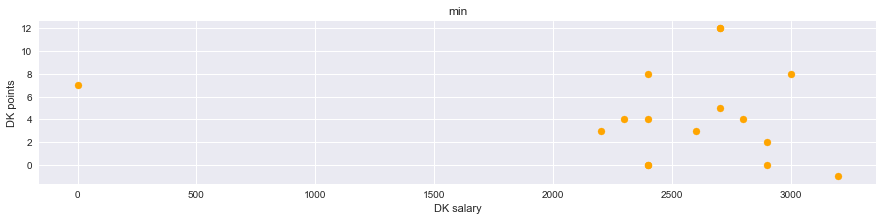

Def lar


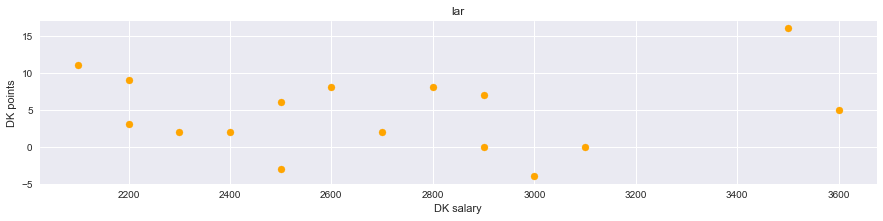

Def lac


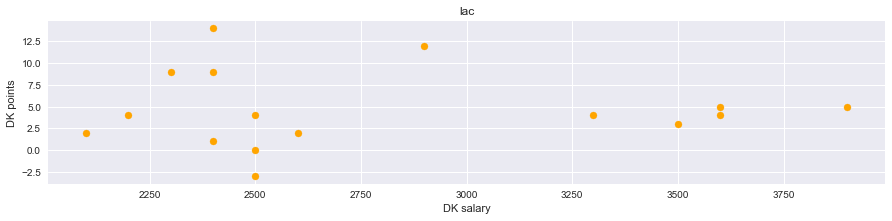

Def -


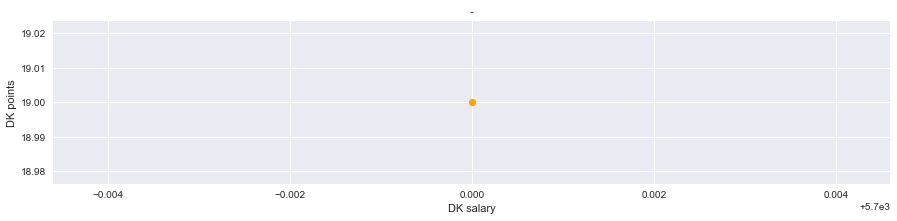

In [56]:
#look at opponent team DK points by position
for pos in ['QB', 'RB', 'WR', 'TE', 'Def']:
    for opp in df_scrape['Oppt'].unique():
        print(pos, opp)
        x = df_scrape[(df_scrape['Oppt'] == opp) & (df_scrape['Pos'] == pos) & (df_scrape['Year'] == 2017)].groupby(['Week']).sum()[['DK points', 'DK salary']]
        plt.figure(figsize=(15,3))
        plt.title(opp)
        plt.xlabel('DK salary')
        plt.ylabel('DK points')
        plt.scatter(x['DK salary'], x['DK points'], color='orange')
        plt.show()

In [77]:
#find opponent DK point distrubution by position
df_scrape[(df_scrape['Year'] == 2017)].groupby(['Pos','Oppt']).mean()[['DK points', 'DK salary']]#.sort_values(by=['Pos','DK points'])
#df_scrape[(df_scrape['Year'] == 2017)].groupby(['Pos','Oppt']).std()[['DK points', 'DK salary']]#.sort_values(by=['Pos','DK points'])

DK points    DK salary
Pos Oppt                        
Def -      9.500000  2850.000000
    ari   10.250000  3006.250000
    atl    5.500000  2456.250000
    bal    4.937500  2950.000000
    buf    7.375000  3137.500000
    car    6.625000  2593.750000
    chi    9.250000  3156.250000
    cin    8.312500  3043.750000
    cle   13.125000  3681.250000
    dal    7.625000  2718.750000
    den   12.375000  2987.500000
    det    7.437500  2743.750000
    gnb    8.812500  2912.500000
    hou   10.187500  3125.000000
    ind   10.187500  3512.500000
    jac    6.125000  2956.250000
    kan    4.250000  2462.500000
    lac    4.687500  2793.750000
    lar    4.500000  2706.250000
    mia    9.333333  3113.333333
    min    4.437500  2475.000000
    nor    4.625000  2337.500000
    nwe    3.625000  2056.250000
    nyg    9.125000  3218.750000
    nyj    9.000000  3387.500000
    oak    7.500000  2787.500000
    phi    6.312500  2550.000000
    pit    4.750000  2468.750000
    sea    6.250000  2650.000000
    sfo    7.875000  3418.750000
    tam    9.000000  2740.000000
    ten    7.625000  2918.750000
    was    9.062500  2843.750000
QB  -     13.200000  5133.333333
    ari   14.402000  5460.000000
    atl   15.736667  6050.000000
    bal   10.884211  4973.684211
    buf   11.212381  5685.714286
    car   16.391765  5917.647059
    chi   10.273636  5231.818182
    cin   13.091000  5225.000000
    cle   15.207000  5530.000000
    dal   14.896842  5915.789474
    den   11.143478  5073.913043
    det   15.291111  5361.111111
    gnb   19.690000  5975.000000
    hou   17.423158  5273.684211
    ind   16.045263  5289.473684
    jac   10.443158  4978.947368
    kan   16.496667  5455.555556
    lac   11.688421  5463.157895
    lar   11.633333  5419.047619
    mia   14.074737  5663.157895
    min   11.012632  5300.000000
    nor   14.503000  5770.000000
    nwe   16.261053  5152.631579
    nyg   17.180000  5589.473684
    nyj   14.116364  5659.090909
    oak   14.910000  5560.000000
    phi   15.040000  5683.333333
    pit   14.558824  5152.941176
    sea   13.165556  5466.666667
    sfo   16.706316  5700.000000
    tam   16.211765  5423.529412
    ten   15.129474  5336.842105
    was   15.192222  5700.000000
RB  -      4.171429  3942.857143
    ari    6.560377  4056.603774
    atl    6.328814  4272.881356
    bal    6.785424  4022.033898
    buf    8.300000  4301.785714
    car    5.433333  4215.000000
    chi    6.887037  3998.148148
    cin    7.012698  4055.555556
    cle    6.894545  4180.000000
    dal    6.745455  4165.454545
    den    6.260000  4003.636364
    det    7.789474  4219.298246
    gnb    7.556364  4223.636364
    hou    6.450000  3878.571429
    ind    6.667213  4080.327869
    jac    7.016981  3994.339623
    kan    6.164912  4154.385965
    lac    6.878333  4098.333333
    lar    7.769091  4040.000000
    mia    7.280357  4155.357143
    min    5.170909  3970.909091
    nor    6.670690  4262.068966
    nwe    6.808772  3933.333333
    nyg    7.416364  4058.181818
    nyj    6.382540  4315.873016
    oak    6.868966  4163.793103
    phi    5.664286  4107.142857
    pit    6.877193  4028.070175
    sea    6.391228  4142.105263
    sfo    7.758182  4116.363636
    tam    7.750000  3909.259259
    ten    6.566667  4082.456140
    was    7.545614  4224.561404
TE  -      4.680000  2900.000000
    ari    4.156818  3047.727273
    atl    4.321951  3129.268293
    bal    4.196000  2760.000000
    buf    4.329787  3138.297872
    car    3.702381  2995.238095
    chi    3.813043  2778.260870
    cin    4.606667  2780.000000
    cle    4.729412  2874.509804
    dal    3.993750  3183.333333
    den    4.861224  3012.244898
    det    4.054348  2702.173913
    gnb    3.515217  2806.521739
    hou    4.636735  2779.591837
    ind    4.213043  2786.956522
    jac    3.431250  2893.750000
    kan    3.361702  2987.234043
    lac    3.438298  3063.829787
    lar    4.076596  2980.851064
    mia    5.951220  3039.024390
    min    3.2863

QB ~  
0.003141 x - 2.936
RB ~  
0.003112 x - 5.967
TE ~  
0.002854 x - 4.267
Def ~  
0.002329 x + 0.8163


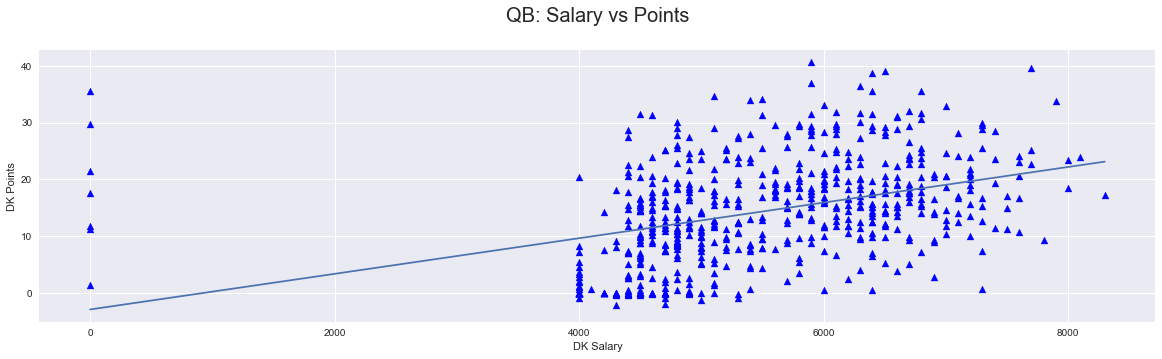

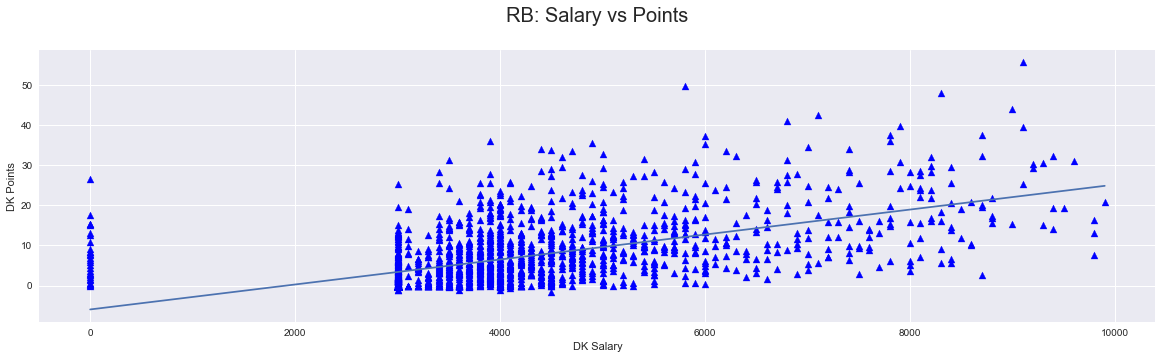

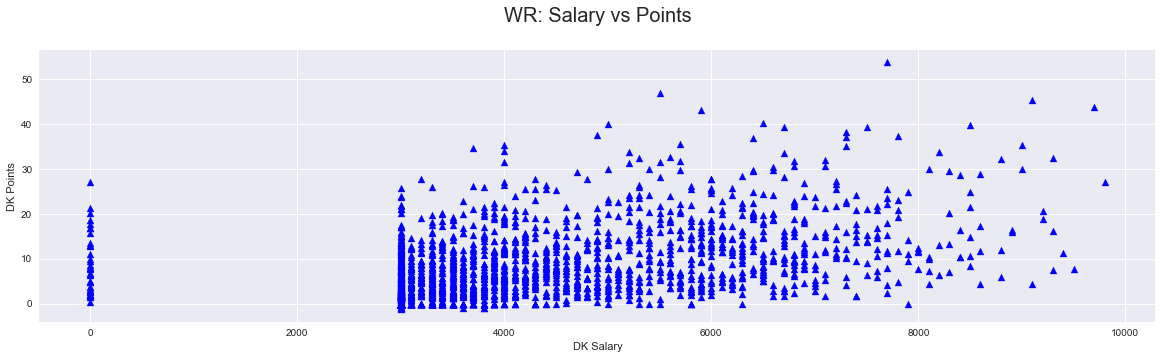

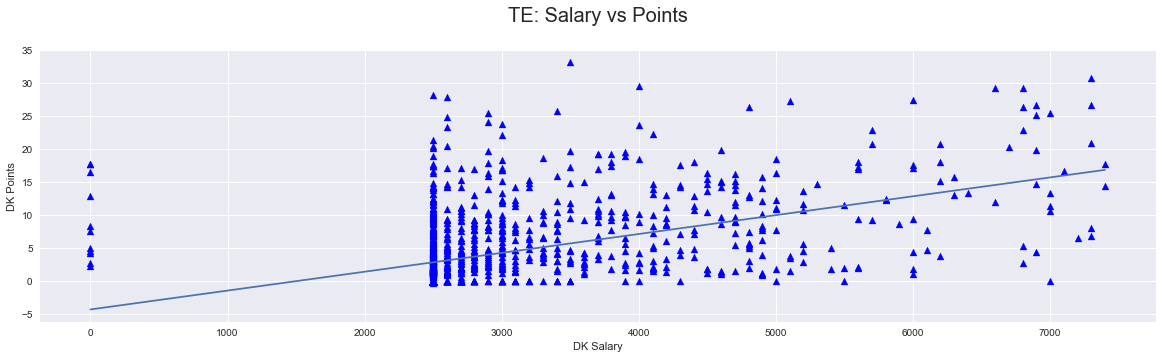

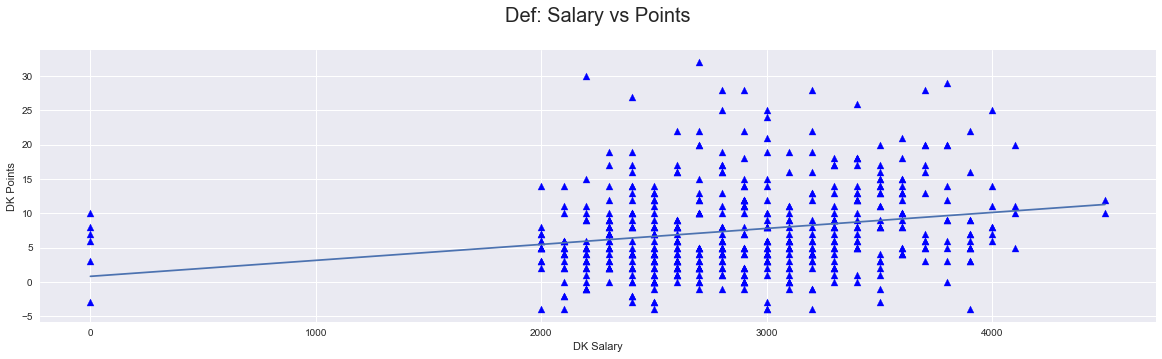

In [17]:
#look at salary distribution and DK points
for position in ['QB','RB','WR','TE','Def']:
    try:
        df_position = df_scrape[(df_scrape['Pos'] == position) & (df_scrape['Year'] == 2017)]
        plt.figure(figsize=(20,5))
        plt.scatter(df_position['DK salary'], df_position['DK points'], marker = '^', color='blue')
        plt.title(position+str(': Salary vs Points\n'), fontsize = 20)
        plt.xlabel('DK Salary')
        plt.ylabel('DK Points')
        print(position,"~",np.poly1d(np.polyfit(df_position['DK salary'], df_position['DK points'], 1)))
        plt.plot(np.unique(df_position['DK salary']), np.poly1d(np.polyfit(df_position['DK salary'], 
                 df_position['DK points'], 1))(np.unique(df_position['DK salary'])))
    except:
        pass

In [49]:
df_scrape.groupby(['Year','Week']).count()

GID  Name  Pos  Team  h/a  Oppt  DK points  DK salary
Year Week                                                       
2014 1     418   418  418   418  418   418        418        417
     2     429   429  429   429  429   429        429        429
     3     437   437  437   437  437   437        437        437
     4     352   352  352   352  352   352        352        352
     5     406   406  406   406  406   406        406        406
     6     403   403  403   403  403   403        403        402
     7     406   406  406   406  406   406        406        406
     8     405   405  405   405  405   405        405        405
     9     356   356  356   356  356   356        356        355
     10    356   356  356   356  356   356        356        356
     11    370   370  370   370  370   370        370        370
     12    399   399  399   399  399   399        399        399
     13    434   434  434   434  434   434        434        433
     14    434   434  434   434  434   434        434        434
     15    435   435  435   435  435   435        435        435
     16    430   430  430   430  430   430        430        430
     17    435   435  435   435  435   435        435        434
2015 1     424   424  424   424  424   424        424        424
     2     431   431  431   431  431   431        431        431
     3     425   425  425   425  425   425        425        425
     4     393   393  393   393  393   393        393        393
     5     375   375  375   375  375   375        375        375
     6     378   378  378   378  378   378        378        377
     7     374   374  374   374  374   374        374        373
     8     380   380  380   380  380   380        380        380
     9     345   345  345   345  345   345        345        345
     10    378   378  378   378  378   378        378        378
     11    367   367  367   367  367   367        367        367
     12    432   432  432   432  432   432        432        431
     13    430   430  430   430  430   430        430        430
     14    435   435  435   435  435   435        435        435
     15    438   438  438   438  438   438        438        437
     16    427   427  427   427  427   427        427        426
     17    428   428  428   428  428   428        428        424
2016 1     398   398  398   398  398   398        398        398
     2     429   429  429   429  429   429        429        428
     3     422   422  422   422  422   422        422        422
     4     396   396  396   396  396   396        396        396
     5     356   356  356   356  356   356        356        356
     6     402   402  402   402  402   402        402        402
     7     394   394  394   394  394   394        394        393
     8     343   343  343   343  343   343        343        342
     9     354   354  354   354  354   354        354        354
     10    381   381  381   381  381   381        381        381
     11    379   379  379   379  379   379        379        378
     12    429   429  429   429  429   429        429        429
     13    400   400  400   400  400   400        400        398
     14    428   428  428   428  428   428        428        428
     15    426   426  426   426  426   426        426        426
     16    419   419  419   419  419   419        419        417
     17    424   424  424   424  424   424        424        421
2017 1     398   398  398   398  398   398        398        397
     2     420   420  420   420  420   420        420        420
     3     428   428  428   428  428   428        428        427
     4     431   431  431   431  431   431        431        430
     5     353   353  353   353  353   353        353        352
     6     374   374  374   374  374   374        374        373
     7     411   411  411   411  411   411        411        411
     8     353   353  353   353  353   353        353        352
     9     352   352  352   352  352   352    